In [3]:
# @joseMaria 
# JMGONB

In [4]:

import numpy as np
import pandas as pd
import json
import matplotlib.pyplot as plt

In [5]:
url="https://covid.ourworldindata.org/data/owid-covid-data.csv"

In [56]:
df=pd.read_csv(url)


In [7]:
df=df.set_index("iso_code")
df

continent       location        date  total_cases  new_cases  \
iso_code                                                                
AFG           Asia    Afghanistan  2019-12-31          0.0        0.0   
AFG           Asia    Afghanistan  2020-01-01          0.0        0.0   
AFG           Asia    Afghanistan  2020-01-02          0.0        0.0   
AFG           Asia    Afghanistan  2020-01-03          0.0        0.0   
AFG           Asia    Afghanistan  2020-01-04          0.0        0.0   
...            ...            ...         ...          ...        ...   
NaN            NaN  International  2020-02-28        705.0        0.0   
NaN            NaN  International  2020-02-29        705.0        0.0   
NaN            NaN  International  2020-03-01        705.0        0.0   
NaN            NaN  International  2020-03-02        705.0        0.0   
NaN            NaN  International  2020-03-10        696.0       -9.0   

          total_deaths  new_deaths  total_cases_per_million  \
iso_code                                                      
AFG                0.0         0.0                      0.0   
AFG                0.0         0.0                      0.0   
AFG                0.0         0.0                      0.0   
AFG                0.0         0.0                      0.0   
AFG                0.0         0.0                      0.0   
...                ...         ...                      ...   
NaN                4.0         0.0                      NaN   
NaN                6.0         2.0                      NaN   
NaN                6.0         0.0                      NaN   
NaN                6.0         0.0                      NaN   
NaN                7.0         1.0                      NaN   

          new_cases_per_million  total_deaths_per_million  ...  aged_70_older  \
iso_code                                                   ...                  
AFG                         0.0                       0.0  ...          1.337   
AFG                         0.0                       0.0  ...          1.337   
AFG                         0.0                       0.0  ...          1.337   
AFG                         0.0                       0.0  ...          1.337   
AFG                         0.0                       0.0  ...          1.337   
...                         ...                       ...  ...            ...   
NaN                         NaN                       NaN  ...            NaN   
NaN                         NaN                       NaN  ...            NaN   
NaN                         NaN                       NaN  ...            NaN   
NaN                         NaN                       NaN  ...            NaN   
NaN                         NaN                       NaN  ...            NaN   

          gdp_per_capita  extreme_poverty  cardiovasc_death_rate  \
iso_code                                                           
AFG             1803.987              NaN                597.029   
AFG             1803.987              NaN                597.029   
AFG             1803.987              NaN                597.029   
AFG             1803.987              NaN                597.029   
AFG             1803.987              NaN                597.029   
...                  ...              ...                    ...   
NaN                  NaN              NaN                    NaN   
NaN                  NaN              NaN                    NaN   
NaN                  NaN              NaN                    NaN   
NaN                  NaN              NaN                    NaN   
NaN                  NaN              NaN                    NaN   

          diabetes_prevalence  female_smokers  male_smokers  \
iso_code                                                      
AFG                      9.59             NaN           NaN   
AFG                      9.59             NaN           NaN   
AFG                      9.59             NaN   

In [8]:
df1=df.loc[["IND","PER","USA","FRA","ESP"],:]
df1.head()

continent location        date  total_cases  new_cases  total_deaths  \
iso_code                                                                        
IND           Asia    India  2019-12-31          0.0        0.0           0.0   
IND           Asia    India  2020-01-01          0.0        0.0           0.0   
IND           Asia    India  2020-01-02          0.0        0.0           0.0   
IND           Asia    India  2020-01-03          0.0        0.0           0.0   
IND           Asia    India  2020-01-04          0.0        0.0           0.0   

          new_deaths  total_cases_per_million  new_cases_per_million  \
iso_code                                                               
IND              0.0                      0.0                    0.0   
IND              0.0                      0.0                    0.0   
IND              0.0                      0.0                    0.0   
IND              0.0                      0.0                    0.0   
IND              0.0                      0.0                    0.0   

          total_deaths_per_million  ...  aged_70_older  gdp_per_capita  \
iso_code                            ...                                  
IND                            0.0  ...          3.414        6426.674   
IND                            0.0  ...          3.414        6426.674   
IND                            0.0  ...          3.414        6426.674   
IND                            0.0  ...          3.414        6426.674   
IND                            0.0  ...          3.414        6426.674   

          extreme_poverty  cardiovasc_death_rate  diabetes_prevalence  \
iso_code                                                                
IND                  21.2                 282.28                10.39   
IND                  21.2                 282.28                10.39   
IND                  21.2                 282.28                10.39   
IND                  21.2                 282.28                10.39   
IND                  21.2                 282.28                10.39   

          female_smokers  male_smokers  handwashing_facilities  \
iso_code                                                         
IND                  1.9          20.6                   59.55   
IND                  1.9          20.6                   59.55   
IND                  1.9          20.6                   59.55   
IND                  1.9          20.6                   59.55   
IND                  1.9          20.6                   59.55   

          hospital_beds_per_thousand life_expectancy  
iso_code                                              
IND                             0.53           69.66  
IND                             0.53           69.66  
IND                             0.53           69.66  
IND                             0.53           69.66  
IND                             0.53           69.66  

[5 rows x 35 columns]

In [9]:
df1['date']=pd.to_datetime(df1['date'],format="%Y/%m/%d")

In [10]:
# Cambiamos los valores Nan por ceros

h=df1.pivot_table('new_deaths', index='date',columns='location')
h=h.fillna(0)
h

location    France  India   Peru  Spain  United States
date                                                  
2019-12-31     0.0    0.0    0.0    0.0            0.0
2020-01-01     0.0    0.0    0.0    0.0            0.0
2020-01-02     0.0    0.0    0.0    0.0            0.0
2020-01-03     0.0    0.0    0.0    0.0            0.0
2020-01-04     0.0    0.0    0.0    0.0            0.0
...            ...    ...    ...    ...            ...
2020-08-05     2.0  857.0  196.0    1.0         1403.0
2020-08-06     9.0  904.0  221.0    1.0         1450.0
2020-08-07     7.0  886.0  196.0    3.0         1848.0
2020-08-08    12.0  933.0  225.0    0.0         1252.0
2020-08-09     0.0  861.0  195.0    0.0         1069.0

[223 rows x 5 columns]

In [11]:
h.index=pd.to_datetime(h.index)  

In [12]:
# El 27 de abril detectamos un outlier en España. La cifra que aparece es de 0, contra la tendencia en esa época. Buscamos la información del Ministerio de Sanidad y la cifra ese día fue de 331. La cambiamos.
h.loc['2020-04-27'][3]=331

In [13]:
# El 22 de mayo detectamos un outlier en España. La cifra que aparece es de 688, contra la tendencia en esa época. Buscamos la información del Ministerio de Sanidad y la cifra ese día fue de 56. La cambiamos.
h.loc['2020-05-22'][3]=56

In [14]:
 #El 25 de mayo detectamos otro outlier en España. La cifra que aparece es de -1918, contra la tendencia en esa época. Buscamos la información del Ministerio de Sanidad y ese día no se facilitó cifra concreta sino que se dio como dato la de los fallecidos en los últimos 7 días, que fue 50, entendemos que era la tendencia. La cambiamos.
h.loc['2020-05-25'][3]=50

In [15]:
h["d_averages"]=h.mean(axis=1)
h

location    France  India   Peru  Spain  United States  d_averages
date                                                              
2019-12-31     0.0    0.0    0.0    0.0            0.0         0.0
2020-01-01     0.0    0.0    0.0    0.0            0.0         0.0
2020-01-02     0.0    0.0    0.0    0.0            0.0         0.0
2020-01-03     0.0    0.0    0.0    0.0            0.0         0.0
2020-01-04     0.0    0.0    0.0    0.0            0.0         0.0
...            ...    ...    ...    ...            ...         ...
2020-08-05     2.0  857.0  196.0    1.0         1403.0       491.8
2020-08-06     9.0  904.0  221.0    1.0         1450.0       517.0
2020-08-07     7.0  886.0  196.0    3.0         1848.0       588.0
2020-08-08    12.0  933.0  225.0    0.0         1252.0       484.4
2020-08-09     0.0  861.0  195.0    0.0         1069.0       425.0

[223 rows x 6 columns]

In [16]:
h.loc['2020-05-01':'2020-06-01']

location    France  India   Peru  Spain  United States  d_averages
date                                                              
2020-05-01   289.0   73.0  108.0  281.0         2040.0       558.2
2020-05-02   218.0   71.0   73.0  276.0         2062.0       540.0
2020-05-03   166.0   83.0   76.0  164.0         1317.0       361.2
2020-05-04   135.0   72.0   86.0  164.0         1297.0       350.8
2020-05-05   306.0  195.0   58.0  185.0         1252.0       399.2
2020-05-06   330.0  126.0  100.0  244.0         2144.0       588.8
2020-05-07   278.0   89.0   89.0  213.0         2353.0       604.4
2020-05-08   178.0  103.0   94.0  181.0         2239.0       559.0
2020-05-09   243.0   95.0   87.0  227.0         1510.0       432.4
2020-05-10    80.0  128.0  100.0  143.0         1614.0       413.0
2020-05-11    70.0   97.0   75.0  123.0          734.0       219.8
2020-05-12   263.0   87.0   72.0  176.0         1156.0       350.8
2020-05-13   348.0  122.0   96.0  184.0         1703.0       490.6
2020-05-14    83.0  134.0  112.0  217.0         1746.0       458.4
2020-05-15   351.0  100.0   98.0  138.0         1773.0       492.0
2020-05-16   130.0  103.0  126.0  104.0         1662.0       425.0
2020-05-17    88.0  120.0  130.0   87.0         1186.0       322.2
2020-05-18    68.0  157.0  125.0   59.0          808.0       243.4
2020-05-19   186.0  134.0  141.0   69.0          791.0       264.2
2020-05-20   125.0  140.0  125.0  110.0         1568.0       413.6
2020-05-21   110.0  132.0  110.0   52.0         1518.0       384.4
2020-05-22    83.0  148.0  124.0   56.0         1263.0       334.8
2020-05-23    74.0  137.0   96.0   50.0         1305.0       332.4
2020-05-24    43.0  147.0  129.0   74.0         1080.0       294.6
2020-05-25    35.0  154.0   83.0   50.0          633.0       191.0
2020-05-26    65.0  146.0  173.0  283.0          500.0       233.4
2020-05-27    98.0  170.0  159.0    1.0          696.0       224.8
2020-05-28    66.0  194.0  195.0    1.0         1526.0       396.4
2020-05-29    66.0  175.0  116.0    2.0         1175.0       306.8
2020-05-30    52.0  265.0  131.0    4.0         1219.0       334.2
2020-05-31    57.0  193.0  141.0    2.0          945.0       267.6
2020-06-01    31.0  230.0  135.0    0.0          602.0       199.6

In [17]:
h.loc['2020-05-01':'2020-06-01'].max()

location
France            351.0
India             265.0
Peru              195.0
Spain             283.0
United States    2353.0
d_averages        604.4
dtype: float64

In [18]:
h=h["d_averages"]

In [19]:
h=h.to_frame()
h

d_averages
date                  
2019-12-31         0.0
2020-01-01         0.0
2020-01-02         0.0
2020-01-03         0.0
2020-01-04         0.0
...                ...
2020-08-05       491.8
2020-08-06       517.0
2020-08-07       588.0
2020-08-08       484.4
2020-08-09       425.0

[223 rows x 1 columns]

(array([18261, 18262, 18293, 18322, 18353, 18383, 18414, 18444, 18475,
        18483], dtype=int64),
 <a list of 10 Text major ticklabel objects>)

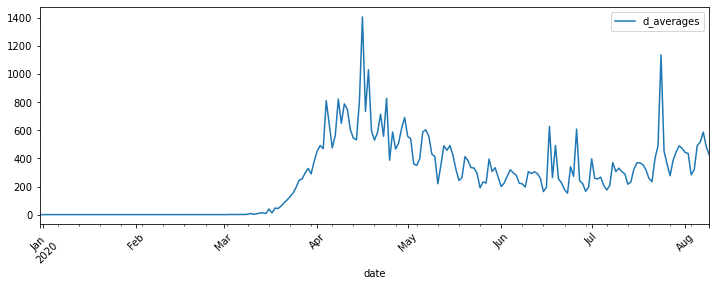

In [20]:
h.plot(figsize=(12,4))
plt.xticks(rotation=45)




In [21]:
n_d=df1.pivot_table('new_deaths', index='date',columns='location')
n_d=n_d.fillna(0)
h

d_averages
date                  
2019-12-31         0.0
2020-01-01         0.0
2020-01-02         0.0
2020-01-03         0.0
2020-01-04         0.0
...                ...
2020-08-05       491.8
2020-08-06       517.0
2020-08-07       588.0
2020-08-08       484.4
2020-08-09       425.0

[223 rows x 1 columns]

In [22]:
# @joseMaria 
# JMGONB

#$$$$$$$$$$$$$$$$ TABLAS Y PLOTS RELACIONADOS CON TOTAL DE CASOS COVID 19$$$$$$$$$$$$$$$$$$$$$$$
    #*Total de casos en los 5 paises seleccionados. Datos que se van actualizando por día a la fecha actual
    #*Total de casos durante el perido de cuarentena en Francia
    #*Total de casos durante el perido de cuarentena en India
    #*Total de casos durante el perido de cuarentena en Perú
    #*Total de casos durante el perido de cuarentena en Spain
    #*Total de casos durante el perido de cuarentena en EEUU




In [23]:
t_c=df1.pivot_table('total_cases', index='date',columns='location') #El 21-01-20 EEUU tiene el primer caso. Francia lo tiene  el 25-01-20, India 30-01-20 y España 1-02-2020 luego solo podemos quitar fechas anteriores al 21-01-2020
t_c=t_c.fillna(0)
t_c

location      France      India      Peru     Spain  United States
date                                                              
2019-12-31       0.0        0.0       0.0       0.0            0.0
2020-01-01       0.0        0.0       0.0       0.0            0.0
2020-01-02       0.0        0.0       0.0       0.0            0.0
2020-01-03       0.0        0.0       0.0       0.0            0.0
2020-01-04       0.0        0.0       0.0       0.0            0.0
...              ...        ...       ...       ...            ...
2020-08-05  192334.0  1908254.0  439890.0  305767.0      4771087.0
2020-08-06  194029.0  1964536.0  447624.0  309855.0      4823891.0
2020-08-07  195633.0  2027074.0  455409.0  314362.0      4883646.0
2020-08-08  197921.0  2088611.0  463875.0  314362.0      4941796.0
2020-08-09  197921.0  2153010.0  471012.0       0.0      4998017.0

[223 rows x 5 columns]

In [24]:
t_c=t_c.loc[~(h==0).all(axis=1)] #Total de casos: Eliminamos las filas cuyos valores son 0 en todas sus columnas
t_c

location      France      India      Peru     Spain  United States
date                                                              
2020-02-15      11.0        3.0       0.0       2.0           15.0
2020-02-27      17.0        3.0       0.0      17.0           59.0
2020-03-01     100.0        3.0       0.0      82.0           69.0
2020-03-02     130.0        3.0       0.0     136.0           89.0
2020-03-03     178.0        5.0       0.0     192.0          103.0
...              ...        ...       ...       ...            ...
2020-08-05  192334.0  1908254.0  439890.0  305767.0      4771087.0
2020-08-06  194029.0  1964536.0  447624.0  309855.0      4823891.0
2020-08-07  195633.0  2027074.0  455409.0  314362.0      4883646.0
2020-08-08  197921.0  2088611.0  463875.0  314362.0      4941796.0
2020-08-09  197921.0  2153010.0  471012.0       0.0      4998017.0

[164 rows x 5 columns]

In [25]:
t_c=t_c.iloc[:-1,:] #España contabiliza más tarde sus datos y tengo que poner el día de ayer como ultimo para que no salga a 0
t_c

location      France      India      Peru     Spain  United States
date                                                              
2020-02-15      11.0        3.0       0.0       2.0           15.0
2020-02-27      17.0        3.0       0.0      17.0           59.0
2020-03-01     100.0        3.0       0.0      82.0           69.0
2020-03-02     130.0        3.0       0.0     136.0           89.0
2020-03-03     178.0        5.0       0.0     192.0          103.0
...              ...        ...       ...       ...            ...
2020-08-04  191295.0  1855745.0  433100.0  302814.0      4713562.0
2020-08-05  192334.0  1908254.0  439890.0  305767.0      4771087.0
2020-08-06  194029.0  1964536.0  447624.0  309855.0      4823891.0
2020-08-07  195633.0  2027074.0  455409.0  314362.0      4883646.0
2020-08-08  197921.0  2088611.0  463875.0  314362.0      4941796.0

[163 rows x 5 columns]

Text(0.5, 1.0, 'TOTAL DE CASOS POR PAIS (PROGRESION)')

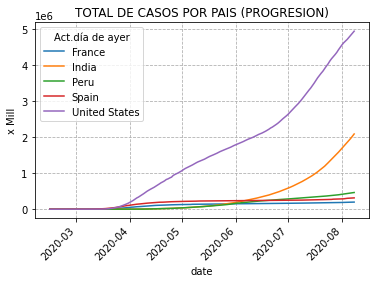

In [26]:
from matplotlib import pyplot as plt
t_c.plot()
plt.legend(title="Act.día de ayer")
plt.xticks(rotation=45)
plt.ylabel("x Mill")
plt.grid(linestyle ='dashed')
plt.title("TOTAL DE CASOS POR PAIS (PROGRESION)")
 #Gráfica tendencia totales de los 6 paises casos por fechas

In [27]:
total_cas=t_c.iloc[-1,:]
total_cas
#Total de casos acumulados por pais

location
France            197921.0
India            2088611.0
Peru              463875.0
Spain             314362.0
United States    4941796.0
Name: 2020-08-08 00:00:00, dtype: float64

In [28]:
total_cas=total_cas.sort_values(ascending=False)

Text(0.5, 1.0, 'TOTAL DE CASOS POR PAIS / VALORES')

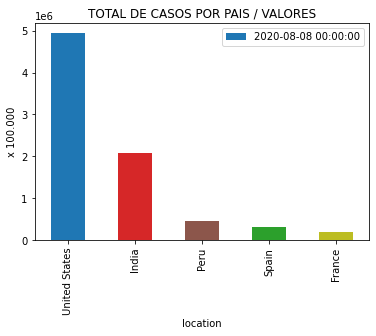

In [29]:

colores_paises = ["#1f77b4","#d62728","#8c564b","#2ca02c","#bcbd22"]
total_cas.plot(kind='bar', color=colores_paises)
plt.legend()
plt.ylabel("x 100.000")
plt.title("TOTAL DE CASOS POR PAIS / VALORES") #Gráfica total casos por pais.(Responde a la pregunta bloque c numero 7 apartado a)

In [30]:
t_c_france=t_c.loc["2020-02-15":"2020-07-10","France"] #periodo del estado de emergencia en Francia
t_c_france

date
2020-02-15        11.0
2020-02-27        17.0
2020-03-01       100.0
2020-03-02       130.0
2020-03-03       178.0
                ...   
2020-07-06    166960.0
2020-07-07    168335.0
2020-07-08    168810.0
2020-07-09    169473.0
2020-07-10    170094.0
Name: France, Length: 134, dtype: float64

Text(0.5, 1.0, 'TOTAL CASOS FRANCIA / PROGRESION DURANTE PERIODO CUARENTENA')

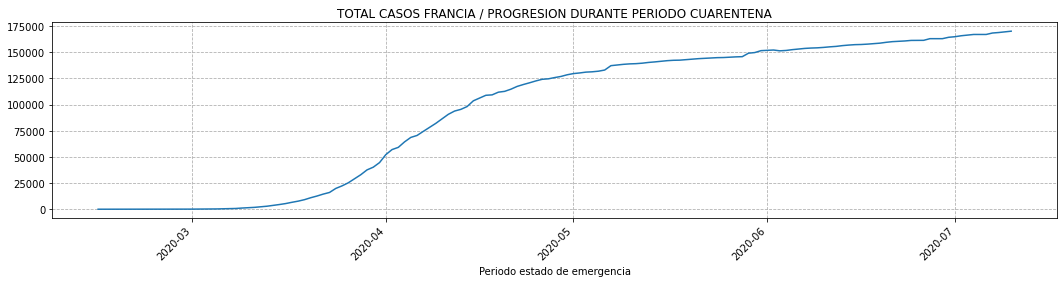

In [31]:
from matplotlib import pyplot as plt
plt.figure(figsize=(18,4))
t_c_france.plot()
plt.xticks(rotation=45)
plt.xlabel("Periodo estado de emergencia")
plt.grid(linestyle ='dashed')
plt.title("TOTAL CASOS FRANCIA / PROGRESION DURANTE PERIODO CUARENTENA")


In [32]:
t_c_india=t_c.loc["2020-03-25":"2020-07-31","India"] #periodo del estado de emergencia en India
t_c_india

date
2020-03-25        562.0
2020-03-26        649.0
2020-03-27        724.0
2020-03-28        873.0
2020-03-29        979.0
                ...    
2020-07-27    1435453.0
2020-07-28    1483156.0
2020-07-29    1531669.0
2020-07-30    1583792.0
2020-07-31    1638870.0
Name: India, Length: 129, dtype: float64

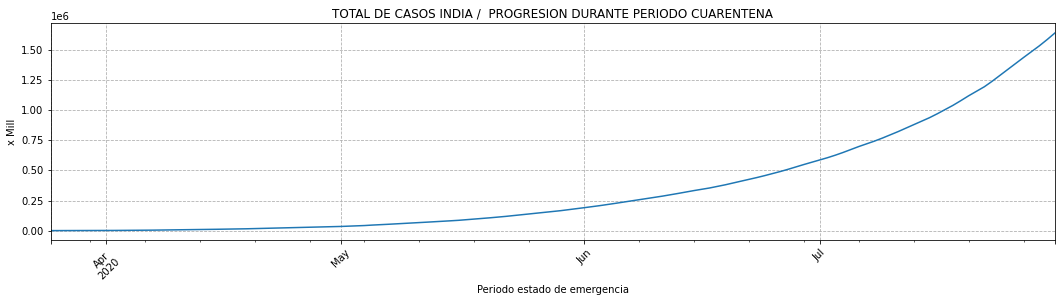

In [33]:
from matplotlib import pyplot as plt
plt.figure(figsize=(18,4))
t_c_india.plot()
plt.xticks(rotation=45)
plt.xlabel("Periodo estado de emergencia")
plt.title("TOTAL DE CASOS INDIA /  PROGRESION DURANTE PERIODO CUARENTENA")
plt.ylabel("x Mill")
plt.grid(linestyle ='dashed')


In [34]:
t_c_peru=t_c.loc["2020-03-16":"2020-06-30","Peru"] #periodo del estado de emergencia en Peru
t_c_peru

date
2020-03-16        71.0
2020-03-17        86.0
2020-03-18       117.0
2020-03-19       145.0
2020-03-20       234.0
                ...   
2020-06-26    268602.0
2020-06-27    272364.0
2020-06-28    275989.0
2020-06-29    279419.0
2020-06-30    282365.0
Name: Peru, Length: 107, dtype: float64

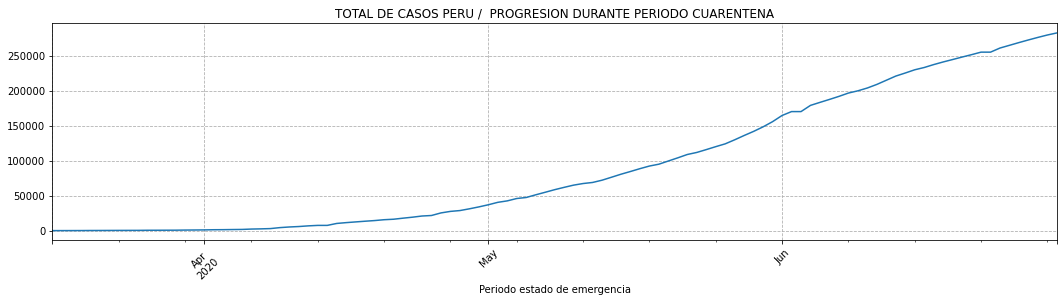

In [35]:
from matplotlib import pyplot as plt
plt.figure(figsize=(18,4))
t_c_peru.plot()
plt.xticks(rotation=45)
plt.xlabel("Periodo estado de emergencia")
plt.title("TOTAL DE CASOS PERU /  PROGRESION DURANTE PERIODO CUARENTENA")
plt.grid(linestyle ='dashed')


In [36]:
t_c_spain=t_c.loc["2020-03-15":"2020-05-25","Spain"] #periodo del estado de emergencia en Spain
t_c_spain

date
2020-03-15      9785.0
2020-03-16     11491.0
2020-03-17     13994.0
2020-03-18     17688.0
2020-03-19     21735.0
                ...   
2020-05-21    233037.0
2020-05-22    234824.0
2020-05-23    235290.0
2020-05-24    235772.0
2020-05-25    235400.0
Name: Spain, Length: 72, dtype: float64

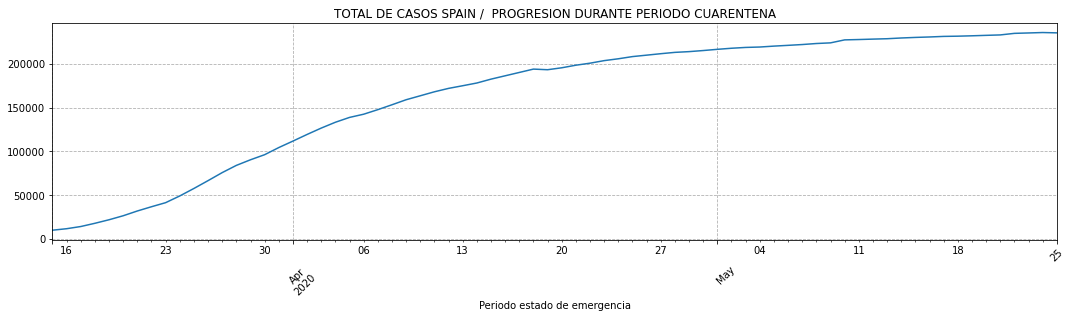

In [37]:
from matplotlib import pyplot as plt
plt.figure(figsize=(18,4))
t_c_spain.plot()
plt.xticks(rotation=45)
plt.xlabel("Periodo estado de emergencia")
plt.title("TOTAL DE CASOS SPAIN /  PROGRESION DURANTE PERIODO CUARENTENA")
plt.grid(linestyle ='dashed')


In [38]:
t_c_eeuu=t_c.loc["2020-04-07":"2020-07-31","United States"] #periodo del estado de emergencia en EEUU
t_c_eeuu

date
2020-04-07     368196.0
2020-04-08     398809.0
2020-04-09     432132.0
2020-04-10     466033.0
2020-04-11     501560.0
                ...    
2020-07-27    4234020.0
2020-07-28    4290263.0
2020-07-29    4351997.0
2020-07-30    4426982.0
2020-07-31    4495014.0
Name: United States, Length: 116, dtype: float64

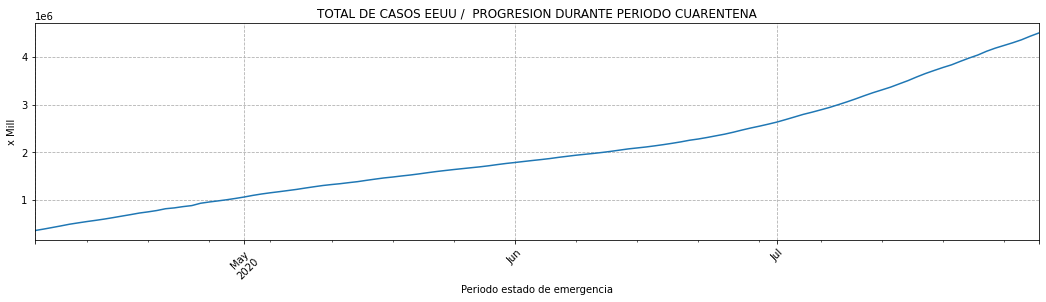

In [39]:
from matplotlib import pyplot as plt
plt.figure(figsize=(18,4))
t_c_eeuu.plot()
plt.xticks(rotation=45)
plt.xlabel("Periodo estado de emergencia")
plt.title("TOTAL DE CASOS EEUU /  PROGRESION DURANTE PERIODO CUARENTENA")
plt.ylabel("x Mill")
plt.grid(linestyle ='dashed')



In [40]:

# @joseMaria 
# JMGONB
#$$$$$$$$$$$$$$$$ TABLAS Y PLOTS RELACIONADOS CON NUEVOS DE CASOS COVID 19$$$$$$$$$$$$$$$$$$$$$$$

    #*Total de nuevos casos por día de Covid 19 en los 5 paises seleccionados. Datos que se van actualizando a la fecha actual
    #*Total de nuevos casos durante el perido de cuarentena en Francia
    #*Total de nuevos casos durante el perido de cuarentena en India
    #*Total de nuevos casos durante el perido de cuarentena en Perú
    #*Total de nuevos casos durante el perido de cuarentena en Spain
    #*Total de nuevos casos durante el perido de cuarentena en EEUU

In [41]:
n_c=df1.pivot_table('new_cases', index='date',columns='location')
n_c=n_c.fillna(0)


In [42]:
n_c=n_c.loc[~(h==0).all(axis=1)]
n_c
#Nuevos casos: Eliminamos las filas cuyos valores son 0 en todas sus columnas

location    France    India    Peru   Spain  United States
date                                                      
2020-02-15     0.0      0.0     0.0     0.0            0.0
2020-02-27     3.0      0.0     0.0     8.0            6.0
2020-03-01    43.0      0.0     0.0    28.0            3.0
2020-03-02    30.0      0.0     0.0    54.0           20.0
2020-03-03    48.0      2.0     0.0    56.0           14.0
...            ...      ...     ...     ...            ...
2020-08-05  1039.0  52509.0  6790.0  2953.0        57525.0
2020-08-06  1695.0  56282.0  7734.0  4088.0        52804.0
2020-08-07  1604.0  62538.0  7785.0  4507.0        59755.0
2020-08-08  2288.0  61537.0  8466.0     0.0        58150.0
2020-08-09     0.0  64399.0  7137.0     0.0        56221.0

[164 rows x 5 columns]

In [43]:
n_c=n_c.iloc[:-1,:]

<function matplotlib.pyplot.show(*args, **kw)>

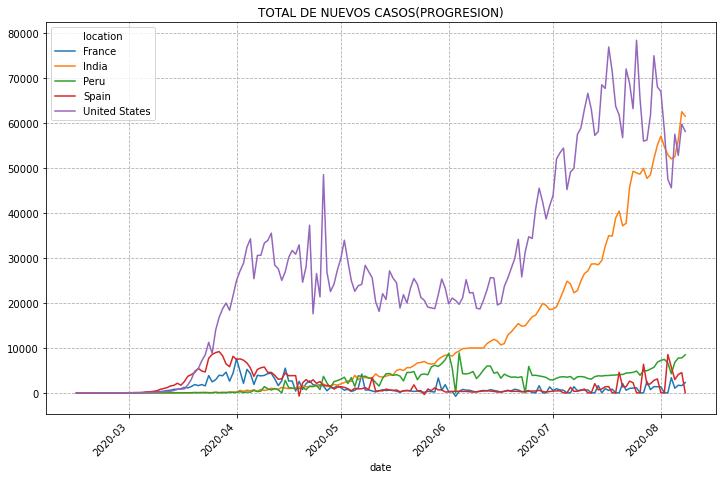

In [44]:
from matplotlib import pyplot
n_c.plot(figsize=(12,8))
plt.xticks(rotation=45)
plt.title("TOTAL DE NUEVOS CASOS(PROGRESION)")
plt.grid(linestyle ='dashed')
pyplot.show
#Gráfica tendencia nuevos casos por fechas

In [45]:
total_n_cas=n_c.iloc[-1,:] #Pongo -2 para que todos los paises hayan calculado los valores del día. 
total_n_cas

location
France            2288.0
India            61537.0
Peru              8466.0
Spain                0.0
United States    58150.0
Name: 2020-08-08 00:00:00, dtype: float64

In [46]:
total_n_cas=total_n_cas.sort_values(ascending=False)

Text(0.5, 1.0, 'TOTAL NUEVOS CASOS')

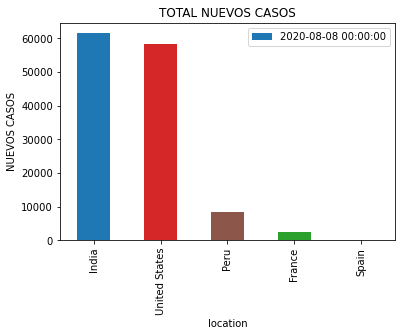

In [47]:
total_n_cas.plot(kind='bar',color=colores_paises)
colores_paises = ["#1f77b4","#d62728","#8c564b","#2ca02c","#bcbd22"]
plt.legend( )
plt.ylabel("NUEVOS CASOS")
plt.title("TOTAL NUEVOS CASOS")  #Gráfica total nuevos casos valores acumulados a dia actual.

<function matplotlib.pyplot.show(*args, **kw)>

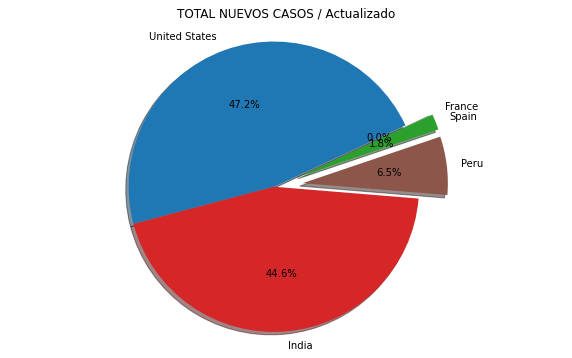

In [48]:
from matplotlib import pyplot
plt.figure(figsize=(10,6))
pais=("United States ","India ","Peru ","Spain","France")
nuevos_casos=total_n_cas
colores_paises = ["#1f77b4","#d62728","#8c564b","#2ca02c","#bcbd22"]
desfase=(0.0,0.0,0.2,0.2,0.2)
pyplot.pie(nuevos_casos,labels=pais,colors=colores_paises,autopct="%1.1f%%",shadow=True,startangle=25,explode=desfase)
pyplot.axis("equal")
pyplot.title("TOTAL NUEVOS CASOS / Actualizado")
pyplot.show

In [49]:
t_n_france=n_c.loc["2020-02-15":"2020-07-10","France"] #periodo del estado de emergencia en Francia
t_n_france

date
2020-02-15       0.0
2020-02-27       3.0
2020-03-01      43.0
2020-03-02      30.0
2020-03-03      48.0
               ...  
2020-07-06       0.0
2020-07-07    1375.0
2020-07-08     475.0
2020-07-09     663.0
2020-07-10     621.0
Name: France, Length: 134, dtype: float64

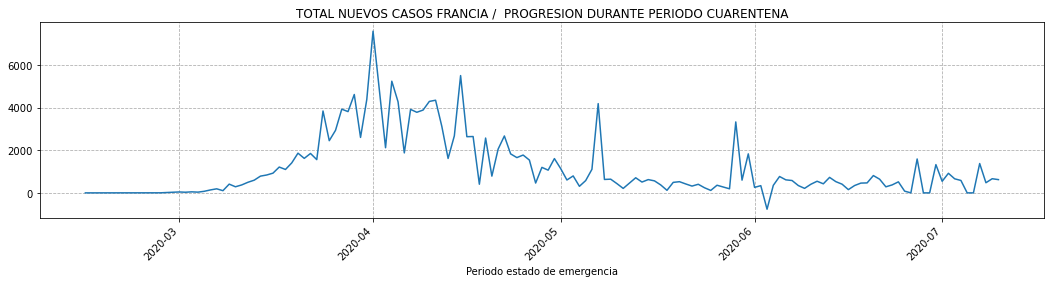

In [50]:
from matplotlib import pyplot as plt
plt.figure(figsize=(18,4))
t_n_france.plot()
plt.xticks(rotation=45)
plt.xlabel("Periodo estado de emergencia")
plt.title("TOTAL NUEVOS CASOS FRANCIA /  PROGRESION DURANTE PERIODO CUARENTENA")
plt.grid(linestyle ='dashed')


In [51]:
t_n_india=n_c.loc["2020-03-25":"2020-07-31","India"] #periodo del estado de emergencia en India
t_n_india

date
2020-03-25       70.0
2020-03-26       87.0
2020-03-27       75.0
2020-03-28      149.0
2020-03-29      106.0
               ...   
2020-07-27    49931.0
2020-07-28    47703.0
2020-07-29    48513.0
2020-07-30    52123.0
2020-07-31    55078.0
Name: India, Length: 129, dtype: float64

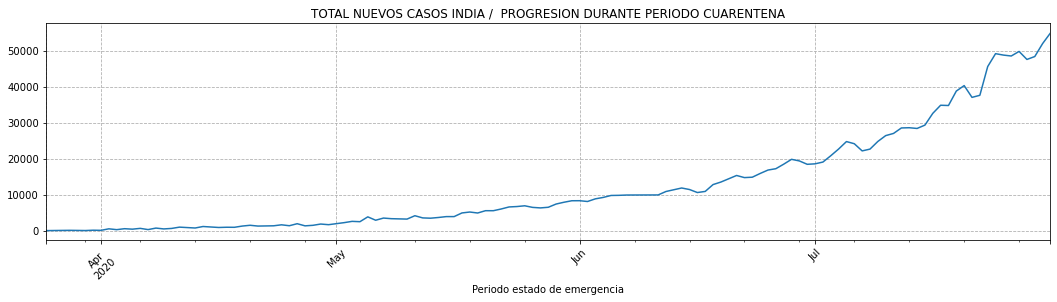

In [52]:
from matplotlib import pyplot as plt
plt.figure(figsize=(18,4))
t_n_india.plot()
plt.xticks(rotation=45)
plt.xlabel("Periodo estado de emergencia")
plt.title("TOTAL NUEVOS CASOS INDIA /  PROGRESION DURANTE PERIODO CUARENTENA")
plt.grid(linestyle ='dashed')

In [53]:
t_n_peru=n_c.loc["2020-03-16":"2020-06-30","Peru"] #periodo del estado de emergencia en Peru
t_n_peru

date
2020-03-16      28.0
2020-03-17      15.0
2020-03-18      31.0
2020-03-19      28.0
2020-03-20      89.0
               ...  
2020-06-26    3913.0
2020-06-27    3762.0
2020-06-28    3625.0
2020-06-29    3430.0
2020-06-30    2946.0
Name: Peru, Length: 107, dtype: float64

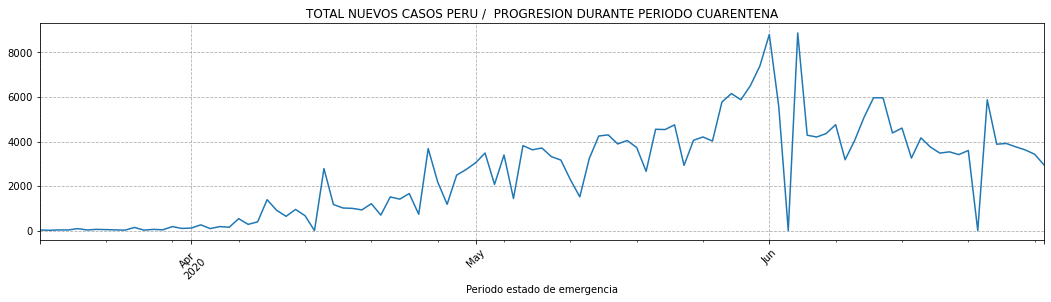

In [54]:
from matplotlib import pyplot as plt
plt.figure(figsize=(18,4))
t_n_peru.plot()
plt.xticks(rotation=45)
plt.xlabel("Periodo estado de emergencia")
plt.title("TOTAL NUEVOS CASOS PERU /  PROGRESION DURANTE PERIODO CUARENTENA")
plt.grid(linestyle ='dashed')

In [55]:
import seaborn as sns
Q1=n_c.quantile(0.25)
Q3=n_c.quantile(0.75)
IQR=Q3-Q1
print(IQR)

location
France            1277.5
India            17917.0
Peru              3914.0
Spain             2621.0
United States    23430.0
dtype: float64


In [57]:
n_c.shape

(163, 5)

In [58]:
out1=n_c[((n_c< (Q1-1.5*IQR))|(n_c>(Q3 + 2*IQR))).any(axis=1)]

In [59]:
# @joseMaria 
# JMGONB
#$$$$ Se aprecia que Perú tiene picos de hasta más de 8000 casos nuevos pero que concentra en el perido los valores entre 1500 y 4000 casos diarios.

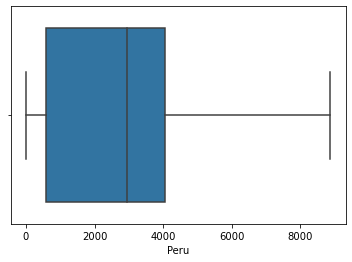

In [60]:
sns.boxplot(x=n_c.loc["2020-03-16":"2020-06-30","Peru"])

In [61]:
t_n_spain=n_c.loc["2020-03-15":"2020-05-25","Spain"] #periodo del estado de emergencia en Spain
t_n_spain

date
2020-03-15    2144.0
2020-03-16    1706.0
2020-03-17    2503.0
2020-03-18    3694.0
2020-03-19    4047.0
               ...  
2020-05-21     482.0
2020-05-22    1787.0
2020-05-23     466.0
2020-05-24     482.0
2020-05-25    -372.0
Name: Spain, Length: 72, dtype: float64

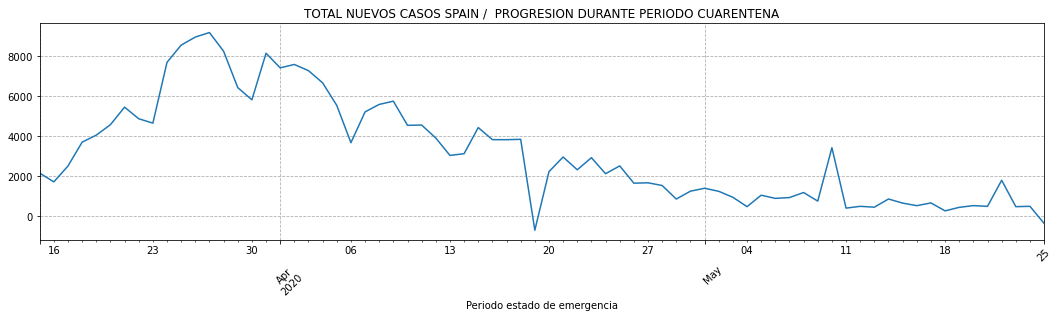

In [62]:
from matplotlib import pyplot as plt
plt.figure(figsize=(18,4))
t_n_spain.plot()
plt.xticks(rotation=45)
plt.xlabel("Periodo estado de emergencia")
plt.title("TOTAL NUEVOS CASOS SPAIN /  PROGRESION DURANTE PERIODO CUARENTENA")
plt.grid(linestyle ='dashed')                   
#vemos que se han quitado contagiados

In [63]:
t_n_eeuu=n_c.loc["2020-04-07":"2020-07-31","United States"] #periodo del estado de emergencia en EEUU
t_n_eeuu

date
2020-04-07    30561.0
2020-04-08    30613.0
2020-04-09    33323.0
2020-04-10    33901.0
2020-04-11    35527.0
               ...   
2020-07-27    55993.0
2020-07-28    56243.0
2020-07-29    61734.0
2020-07-30    74985.0
2020-07-31    68032.0
Name: United States, Length: 116, dtype: float64

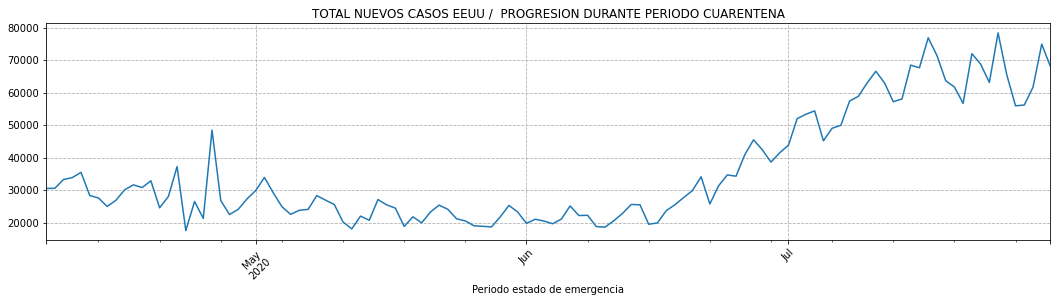

In [64]:
from matplotlib import pyplot as plt
plt.figure(figsize=(18,4))
t_n_eeuu.plot()
plt.xticks(rotation=45)
plt.xlabel("Periodo estado de emergencia")
plt.title("TOTAL NUEVOS CASOS EEUU /  PROGRESION DURANTE PERIODO CUARENTENA")
plt.grid(linestyle ='dashed')

In [65]:

# @joseMaria 
# JMGONB
#$$$$$$$$$$$$$$$$ TABLAS Y PLOTS RELACIONADOS CON MUERTES TOTALES COVID 19$$$$$$$$$$$$$$$$$$$$$$$

    #*Total de muertes  Covid 19 en los 5 paises seleccionados. Datos que se van actualizando a la fecha actual
    #*Total de muertes durante el perido de cuarentena en Francia
    #*Total de muertes durante el perido de cuarentena en India
    #*Total de muertes durante el perido de cuarentena en Perú
    #*Total de muertes durante el perido de cuarentena en Spain
    #*Total de muertes durante el perido de cuarentena en EEUU
    #*Total muertos durante los periodos de cuarentena de los 5 paises en una mismo plot.

In [66]:
t_d=df1.pivot_table('total_deaths', index='date',columns='location')
t_d=t_d.fillna(0)


In [67]:
t_d=t_d.loc[~(h==0).all(axis=1)]
t_d
#Total de muertes:Eliminamos las filas cuyos valores son 0 en todas sus columnas

location     France    India     Peru    Spain  United States
date                                                         
2020-02-15      1.0      0.0      0.0      0.0            0.0
2020-02-27      2.0      0.0      0.0      0.0            0.0
2020-03-01      2.0      0.0      0.0      0.0            1.0
2020-03-02      2.0      0.0      0.0      0.0            2.0
2020-03-03      3.0      0.0      0.0      0.0            6.0
...             ...      ...      ...      ...            ...
2020-08-05  30296.0  39795.0  20007.0  28499.0       156806.0
2020-08-06  30305.0  40699.0  20228.0  28500.0       158256.0
2020-08-07  30312.0  41585.0  20424.0  28503.0       160104.0
2020-08-08  30324.0  42518.0  20649.0  28503.0       161356.0
2020-08-09  30324.0  43379.0  20844.0      0.0       162425.0

[164 rows x 5 columns]

In [68]:
t_d=t_d.iloc[:-1,:]

In [69]:
t_d

location     France    India     Peru    Spain  United States
date                                                         
2020-02-15      1.0      0.0      0.0      0.0            0.0
2020-02-27      2.0      0.0      0.0      0.0            0.0
2020-03-01      2.0      0.0      0.0      0.0            1.0
2020-03-02      2.0      0.0      0.0      0.0            2.0
2020-03-03      3.0      0.0      0.0      0.0            6.0
...             ...      ...      ...      ...            ...
2020-08-04  30294.0  38938.0  19811.0  28498.0       155403.0
2020-08-05  30296.0  39795.0  20007.0  28499.0       156806.0
2020-08-06  30305.0  40699.0  20228.0  28500.0       158256.0
2020-08-07  30312.0  41585.0  20424.0  28503.0       160104.0
2020-08-08  30324.0  42518.0  20649.0  28503.0       161356.0

[163 rows x 5 columns]

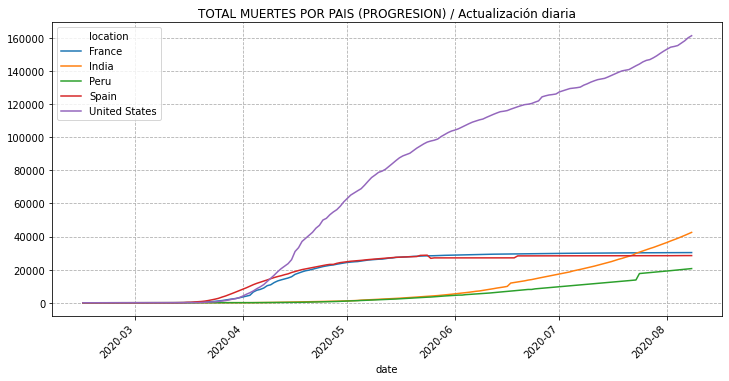

In [70]:
t_d.plot(figsize=(12,6))
plt.xticks(rotation=45)
plt.title("TOTAL MUERTES POR PAIS (PROGRESION) / Actualización diaria")
plt.grid(linestyle ='dashed')  #Gráfica tendencia total muertes por fechas

In [71]:
total_dead=t_d.iloc[-1,:]
total_dead

location
France            30324.0
India             42518.0
Peru              20649.0
Spain             28503.0
United States    161356.0
Name: 2020-08-08 00:00:00, dtype: float64

In [72]:
total_dead=total_dead.sort_values(ascending=False)

Text(0.5, 1.0, 'TOTAL MUERTES POR PAIS (Actualización diaria)')

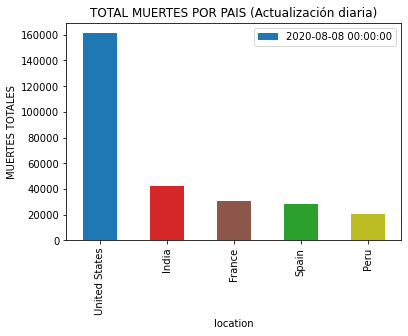

In [73]:
total_dead.plot(kind='bar',color=colores_paises)
colores_paises = ["#1f77b4","#d62728","#8c564b","#2ca02c","#bcbd22"]
plt.legend( )
plt.ylabel("MUERTES TOTALES")
plt.title("TOTAL MUERTES POR PAIS (Actualización diaria)") #Gráfica total muertes casos por pais.(Responde a la pregunta bloque c numero 7 apartado b)

<function matplotlib.pyplot.show(*args, **kw)>

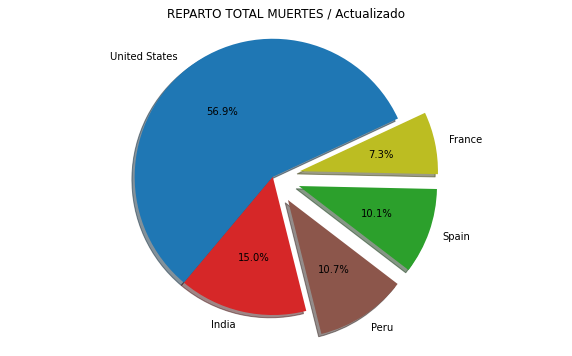

In [74]:
from matplotlib import pyplot
plt.figure(figsize=(10,6))
pais=("United States ","India ","Peru ","Spain","France")
muertes=total_dead
colores_paises = ["#1f77b4","#d62728","#8c564b","#2ca02c","#bcbd22"]
desfase=(0.0,0.0,0.2,0.2,0.2)
pyplot.pie(muertes,labels=pais,colors=colores_paises,autopct="%1.1f%%",shadow=True,startangle=25,explode=desfase)
pyplot.axis("equal")
pyplot.title("REPARTO TOTAL MUERTES / Actualizado")
pyplot.show

In [75]:
t_d_france=t_d.loc["2020-02-15":"2020-07-10","France"] #periodo del estado de emergencia en Francia
t_d_france

date
2020-02-15        1.0
2020-02-27        2.0
2020-03-01        2.0
2020-03-02        2.0
2020-03-03        3.0
               ...   
2020-07-06    29893.0
2020-07-07    29920.0
2020-07-08    29933.0
2020-07-09    29965.0
2020-07-10    29979.0
Name: France, Length: 134, dtype: float64

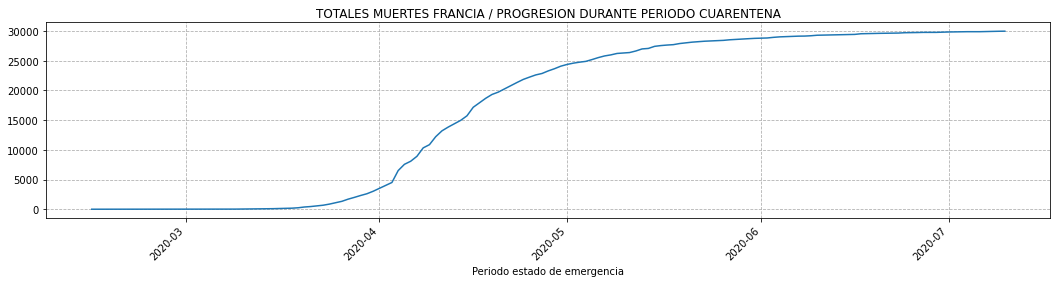

In [76]:
from matplotlib import pyplot as plt
plt.figure(figsize=(18,4))
t_d_france.plot()
plt.xticks(rotation=45)
plt.xlabel("Periodo estado de emergencia")
plt.title("TOTALES MUERTES FRANCIA / PROGRESION DURANTE PERIODO CUARENTENA")
plt.grid(linestyle ='dashed')

In [77]:
t_d_india=t_d.loc["2020-03-25":"2020-07-31","India"] #periodo del estado de emergencia en India
t_d_india

date
2020-03-25        9.0
2020-03-26       13.0
2020-03-27       17.0
2020-03-28       19.0
2020-03-29       25.0
               ...   
2020-07-27    32771.0
2020-07-28    33425.0
2020-07-29    34193.0
2020-07-30    34968.0
2020-07-31    35747.0
Name: India, Length: 129, dtype: float64

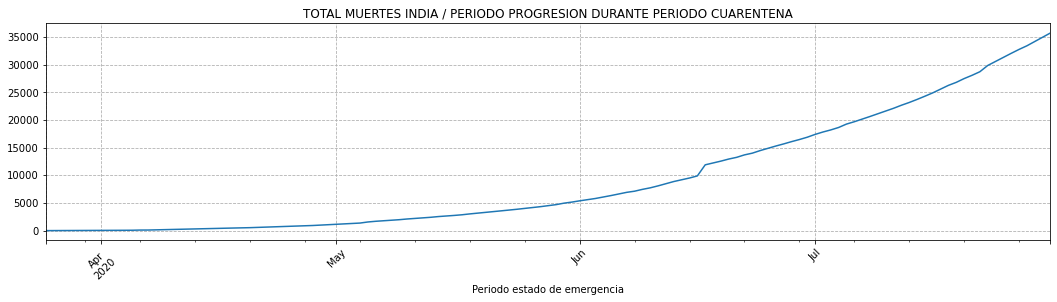

In [78]:
from matplotlib import pyplot as plt
plt.figure(figsize=(18,4))
t_d_india.plot()
plt.xticks(rotation=45)
plt.xlabel("Periodo estado de emergencia")
plt.title("TOTAL MUERTES INDIA / PERIODO PROGRESION DURANTE PERIODO CUARENTENA")
plt.grid(linestyle ='dashed')

In [79]:
t_d_peru=t_d.loc["2020-03-16":"2020-06-30","Peru"] #periodo del estado de emergencia en Peru
t_d_peru

date
2020-03-16       0.0
2020-03-17       0.0
2020-03-18       0.0
2020-03-19       0.0
2020-03-20       2.0
               ...  
2020-06-26    8761.0
2020-06-27    8939.0
2020-06-28    9135.0
2020-06-29    9317.0
2020-06-30    9504.0
Name: Peru, Length: 107, dtype: float64

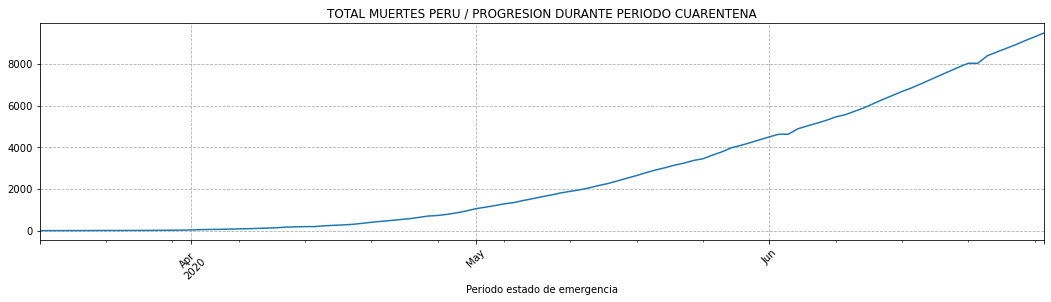

In [80]:
from matplotlib import pyplot as plt
plt.figure(figsize=(18,4))
t_d_peru.plot()
plt.xticks(rotation=45)
plt.xlabel("Periodo estado de emergencia")
plt.title("TOTAL MUERTES PERU / PROGRESION DURANTE PERIODO CUARENTENA")
plt.grid(linestyle ='dashed')

In [81]:
t_d_spain=t_d.loc["2020-03-15":"2020-05-25","Spain"] #periodo del estado de emergencia en Spain
t_d_spain

date
2020-03-15      136.0
2020-03-16      288.0
2020-03-17      309.0
2020-03-18      491.0
2020-03-19      598.0
               ...   
2020-05-21    27940.0
2020-05-22    28628.0
2020-05-23    28678.0
2020-05-24    28752.0
2020-05-25    26834.0
Name: Spain, Length: 72, dtype: float64

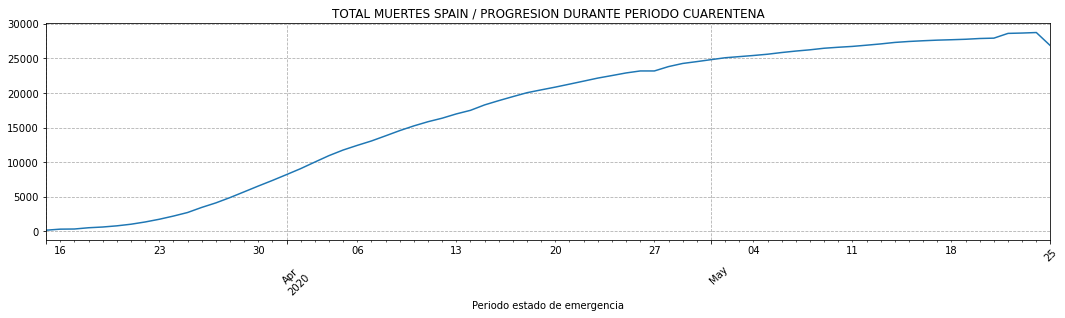

In [82]:
from matplotlib import pyplot as plt
plt.figure(figsize=(18,4))
t_d_spain.plot()
plt.xticks(rotation=45)
plt.xlabel("Periodo estado de emergencia")
plt.title("TOTAL MUERTES SPAIN / PROGRESION DURANTE PERIODO CUARENTENA")
plt.grid(linestyle ='dashed')

In [83]:
t_d_eeuu=t_d.loc["2020-04-07":"2020-07-31","United States"] #periodo del estado de emergencia en EEUU
t_d_eeuu

date
2020-04-07     10989.0
2020-04-08     12895.0
2020-04-09     14817.0
2020-04-10     16690.0
2020-04-11     18777.0
                ...   
2020-07-27    146935.0
2020-07-28    148011.0
2020-07-29    149256.0
2020-07-30    150713.0
2020-07-31    152070.0
Name: United States, Length: 116, dtype: float64

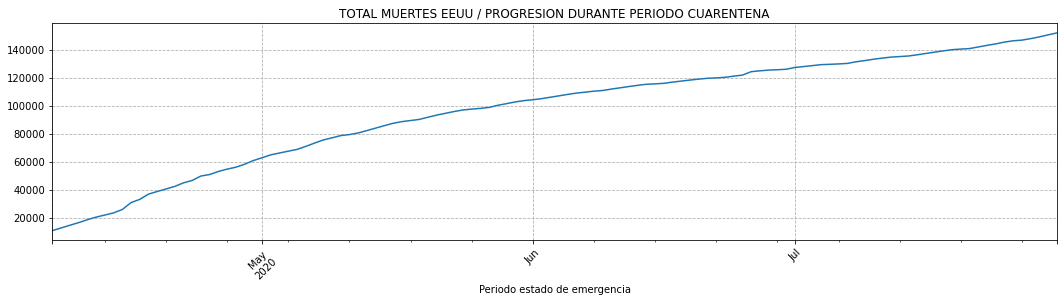

In [84]:
from matplotlib import pyplot as plt
plt.figure(figsize=(18,4))
t_d_eeuu.plot()
plt.xticks(rotation=45)
plt.xlabel("Periodo estado de emergencia")
plt.title("TOTAL MUERTES EEUU / PROGRESION DURANTE PERIODO CUARENTENA")
plt.grid(linestyle ='dashed')

In [85]:
dead1=pd.merge(t_d_france,t_d_peru,on='date',how='outer') #Con el objetivo de sacar los datos de muertos totales de los 5 paises en una misma gráfica y en una misma tabla, voy uniendo tablas porque tengo que unir de dos en dos hasta conseguir tener todo en una

In [86]:
dead2=pd.merge(t_d_india,t_d_spain,on='date',how='outer')

In [87]:
dead2.sort_values(["date"],ascending=True)

India  Spain
date                      
2020-03-15      NaN  136.0
2020-03-16      NaN  288.0
2020-03-17      NaN  309.0
2020-03-18      NaN  491.0
2020-03-19      NaN  598.0
...             ...    ...
2020-07-27  32771.0    NaN
2020-07-28  33425.0    NaN
2020-07-29  34193.0    NaN
2020-07-30  34968.0    NaN
2020-07-31  35747.0    NaN

[139 rows x 2 columns]

In [88]:
dead3=pd.merge(dead1,dead2,on='date',how='outer')

In [89]:
dead3.sort_values(["date"],ascending=True)

France  Peru    India  Spain
date                                    
2020-02-15     1.0   NaN      NaN    NaN
2020-02-27     2.0   NaN      NaN    NaN
2020-03-01     2.0   NaN      NaN    NaN
2020-03-02     2.0   NaN      NaN    NaN
2020-03-03     3.0   NaN      NaN    NaN
...            ...   ...      ...    ...
2020-07-27     NaN   NaN  32771.0    NaN
2020-07-28     NaN   NaN  33425.0    NaN
2020-07-29     NaN   NaN  34193.0    NaN
2020-07-30     NaN   NaN  34968.0    NaN
2020-07-31     NaN   NaN  35747.0    NaN

[155 rows x 4 columns]

In [90]:
dead4=pd.merge(dead3,t_d_eeuu,on='date',how='outer')
dead4=dead4.fillna(0)

In [91]:
dead4.sort_values(["date"],ascending=True)

France  Peru    India  Spain  United States
date                                                   
2020-02-15     1.0   0.0      0.0    0.0            0.0
2020-02-27     2.0   0.0      0.0    0.0            0.0
2020-03-01     2.0   0.0      0.0    0.0            0.0
2020-03-02     2.0   0.0      0.0    0.0            0.0
2020-03-03     3.0   0.0      0.0    0.0            0.0
...            ...   ...      ...    ...            ...
2020-07-27     0.0   0.0  32771.0    0.0       146935.0
2020-07-28     0.0   0.0  33425.0    0.0       148011.0
2020-07-29     0.0   0.0  34193.0    0.0       149256.0
2020-07-30     0.0   0.0  34968.0    0.0       150713.0
2020-07-31     0.0   0.0  35747.0    0.0       152070.0

[155 rows x 5 columns]

In [92]:
dead5=dead4.max()
dead5    #Valores de la última contabilidad realizada en cada país al final de sus periodos de cuarentena

France            29979.0
Peru               9504.0
India             35747.0
Spain             28752.0
United States    152070.0
dtype: float64

In [93]:
dead5=dead5.sort_values(ascending=False)

Text(0.5, 1.0, 'TOTAL MUERTES PERIODO CUARENTENAS ')

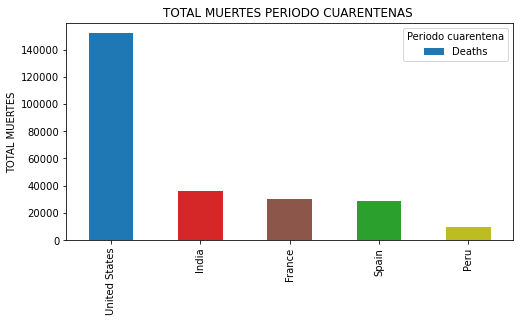

In [94]:
from matplotlib import pyplot as plt
plt.figure(figsize=(8,4))

dead5.plot(kind='bar',color=colores_paises,label="Deaths")
colores_paises = ["#1f77b4","#d62728","#8c564b","#2ca02c","#bcbd22"]
plt.legend(title="Periodo cuarentena" )
plt.ylabel("TOTAL MUERTES")
plt.title("TOTAL MUERTES PERIODO CUARENTENAS ")
#GRAFICA DE MUERTES contabilizadas DURANTE EL PERIODO DE CUARETENAS DE LOS PAISES.  LA TABLA RESUME LO QUE OCURRIO EN CADA PAIs

In [95]:
n_d=df1.pivot_table('new_deaths', index='date',columns='location')
n_d=n_d.fillna(0)


In [96]:
  # @joseMaria 
  # JMGONB
  
   #$$$$$$$$$$$$$$$$ TABLAS Y PLOTS RELACIONADOS CON NUEVAS MUERTES COVID 19$$$$$$$$$$$$$$$$$$$$$$$
   
    #*Total de nuevas muertes por día  Covid 19 en los 5 paises seleccionados. Datos que se van actualizando a la fecha actual
    #*Total de nuevas muertes durante el perido de cuarentena en Francia
    #*Total de nuevas muertes durante el perido de cuarentena en India
    #*Total de nuevas muertes durante el perido de cuarentena en Perú
    #*Total de nuevas muertes durante el perido de cuarentena en Spain
    #*Total de nuevas muertes durante el perido de cuarentena en EEUU
    #*Total de nuevas muertes durante los periodos de cuarentena de los 5 paises en una mismo plot.

In [97]:
n_d=n_d.loc[~(h==0).all(axis=1)]
n_d
#Nuevas muertes: Eliminamos las filas cuyos valores son 0 en todas sus columnas

location    France  India   Peru  Spain  United States
date                                                  
2020-02-15     1.0    0.0    0.0    0.0            0.0
2020-02-27     1.0    0.0    0.0    0.0            0.0
2020-03-01     0.0    0.0    0.0    0.0            1.0
2020-03-02     0.0    0.0    0.0    0.0            1.0
2020-03-03     1.0    0.0    0.0    0.0            4.0
...            ...    ...    ...    ...            ...
2020-08-05     2.0  857.0  196.0    1.0         1403.0
2020-08-06     9.0  904.0  221.0    1.0         1450.0
2020-08-07     7.0  886.0  196.0    3.0         1848.0
2020-08-08    12.0  933.0  225.0    0.0         1252.0
2020-08-09     0.0  861.0  195.0    0.0         1069.0

[164 rows x 5 columns]

In [98]:
n_d=n_d.iloc[:-1,:]
n_d

location    France  India   Peru  Spain  United States
date                                                  
2020-02-15     1.0    0.0    0.0    0.0            0.0
2020-02-27     1.0    0.0    0.0    0.0            0.0
2020-03-01     0.0    0.0    0.0    0.0            1.0
2020-03-02     0.0    0.0    0.0    0.0            1.0
2020-03-03     1.0    0.0    0.0    0.0            4.0
...            ...    ...    ...    ...            ...
2020-08-04    29.0  803.0  197.0   26.0          543.0
2020-08-05     2.0  857.0  196.0    1.0         1403.0
2020-08-06     9.0  904.0  221.0    1.0         1450.0
2020-08-07     7.0  886.0  196.0    3.0         1848.0
2020-08-08    12.0  933.0  225.0    0.0         1252.0

[163 rows x 5 columns]

In [99]:
n_d.loc["2020-05-18":"2020-05-30","Spain"]  #outlier Spain

date
2020-05-18      59.0
2020-05-19      69.0
2020-05-20     110.0
2020-05-21      52.0
2020-05-22     688.0
2020-05-23      50.0
2020-05-24      74.0
2020-05-25   -1918.0
2020-05-26     283.0
2020-05-27       1.0
2020-05-28       1.0
2020-05-29       2.0
2020-05-30       4.0
Name: Spain, dtype: float64

In [100]:
n_d.sum()

location
France            30324.0
India             42518.0
Peru              20649.0
Spain             28503.0
United States    161356.0
dtype: float64

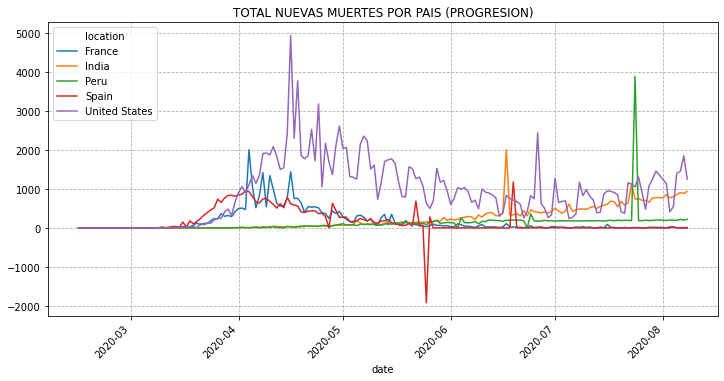

In [101]:
n_d.plot(figsize=(12,6))
plt.xticks(rotation=45)
plt.title("TOTAL NUEVAS MUERTES POR PAIS (PROGRESION)")
plt.grid(linestyle ='dashed')
 #Gráfica tendencia total nuevas  muertes por fechas, en el caso de España se aprecia dos outlier entre 22 y 25 de Mayo

In [102]:
n_d.index=pd.to_datetime(n_d.index)  

In [103]:
n_d_1=n_d.resample('M').sum() #agrupo por meses para mejor visualizacion 

In [104]:
n_d_1.sum()

location
France            30324.0
India             42518.0
Peru              20649.0
Spain             28503.0
United States    161356.0
dtype: float64

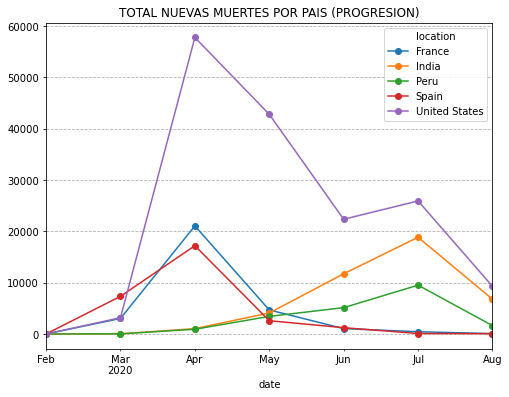

In [105]:
n_d_1.plot(figsize=(8,6),marker = 'o')
plt.xticks(rotation=45)
plt.title("TOTAL NUEVAS MUERTES POR PAIS (PROGRESION)")
plt.grid(linestyle ='dashed')
#Esta gráfica representa los mismos valores que la gráfica anterior pero agrupados de mes en mes, es importante ver como se enmascaran los outlier de los días de mayo mecionados. Al tomar la gráfica el acumulado del més se diluyen.

In [106]:
total_new_dead=n_d.iloc[-1,:]
total_new_dead

location
France             12.0
India             933.0
Peru              225.0
Spain               0.0
United States    1252.0
Name: 2020-08-08 00:00:00, dtype: float64

In [107]:
total_new_dead=total_new_dead.sort_values(ascending=False)

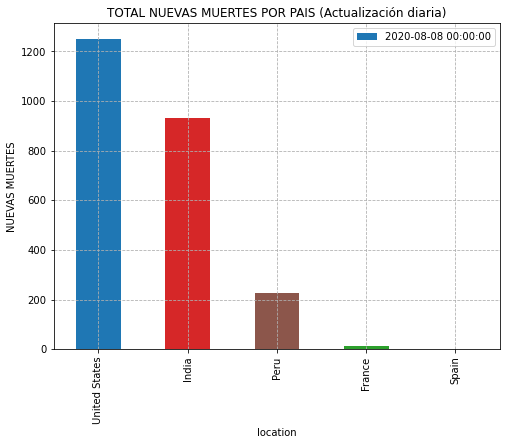

In [108]:
total_new_dead.plot(figsize=(8,6),kind='bar', color=colores_paises)
colores_paises = ["#1f77b4","#d62728","#8c564b","#2ca02c","#bcbd22"]
plt.legend( )
plt.ylabel("NUEVAS MUERTES")
plt.title("TOTAL NUEVAS MUERTES POR PAIS (Actualización diaria)")
plt.grid(linestyle = 'dashed')  #Gráfica total nuevas muertes valores acumulados a dia actual.


<function matplotlib.pyplot.show(*args, **kw)>

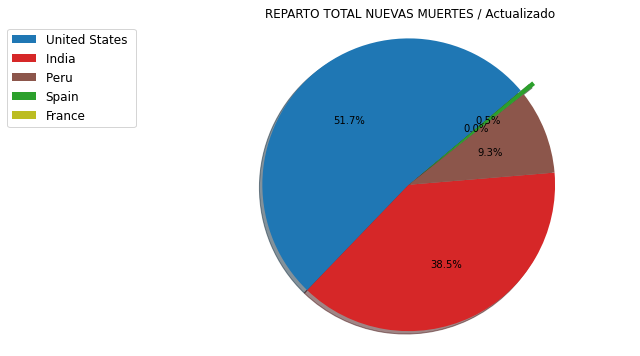

In [109]:
from matplotlib import pyplot
plt.figure(figsize=(8,6))
pais=("United States ","India ","Peru ","Spain","France")
nuevas_muertes=total_new_dead
colores_paises = ["#1f77b4","#d62728","#8c564b","#2ca02c","#bcbd22"]
desfase=(0.0,0.0,0.0,0.1,0.0)
pyplot.pie(nuevas_muertes,colors=colores_paises,autopct="%1.1f%%",shadow=True,startangle=40,explode=desfase)
pyplot.axis("equal")
pyplot.title("REPARTO TOTAL NUEVAS MUERTES / Actualizado")
plt.legend(nuevas_muertes, labels=pais, loc='left center', bbox_to_anchor=(-0.1, 1.),
              fontsize=12)
pyplot.show

In [110]:
n_d

location    France  India   Peru  Spain  United States
date                                                  
2020-02-15     1.0    0.0    0.0    0.0            0.0
2020-02-27     1.0    0.0    0.0    0.0            0.0
2020-03-01     0.0    0.0    0.0    0.0            1.0
2020-03-02     0.0    0.0    0.0    0.0            1.0
2020-03-03     1.0    0.0    0.0    0.0            4.0
...            ...    ...    ...    ...            ...
2020-08-04    29.0  803.0  197.0   26.0          543.0
2020-08-05     2.0  857.0  196.0    1.0         1403.0
2020-08-06     9.0  904.0  221.0    1.0         1450.0
2020-08-07     7.0  886.0  196.0    3.0         1848.0
2020-08-08    12.0  933.0  225.0    0.0         1252.0

[163 rows x 5 columns]

In [111]:
n_d.index=pd.to_datetime(n_d.index) 

In [112]:
n_d_france=n_d.loc["2020-02-15":"2020-07-10","France"]
n_d_france
 #periodo del estado de emergencia en Francia

date
2020-02-15     1.0
2020-02-27     1.0
2020-03-01     0.0
2020-03-02     0.0
2020-03-03     1.0
              ... 
2020-07-06     0.0
2020-07-07    27.0
2020-07-08    13.0
2020-07-09    32.0
2020-07-10    14.0
Name: France, Length: 134, dtype: float64

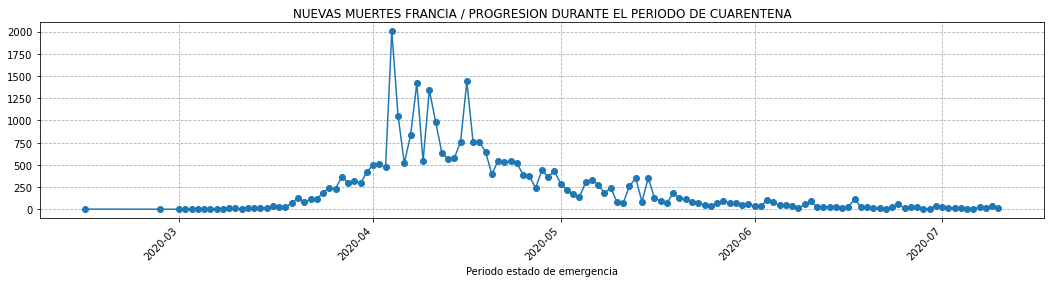

In [113]:
from matplotlib import pyplot as plt
plt.figure(figsize=(18,4))
n_d_france.plot(marker = 'o')
plt.xticks(rotation=45)
plt.xlabel("Periodo estado de emergencia")
plt.title("NUEVAS MUERTES FRANCIA / PROGRESION DURANTE EL PERIODO DE CUARENTENA")
plt.grid(linestyle ='dashed')

In [114]:
n_d_india=n_d.loc["2020-03-25":"2020-07-31","India"] #periodo del estado de emergencia en India
n_d_india

date
2020-03-25      0.0
2020-03-26      4.0
2020-03-27      4.0
2020-03-28      2.0
2020-03-29      6.0
              ...  
2020-07-27    708.0
2020-07-28    654.0
2020-07-29    768.0
2020-07-30    775.0
2020-07-31    779.0
Name: India, Length: 129, dtype: float64

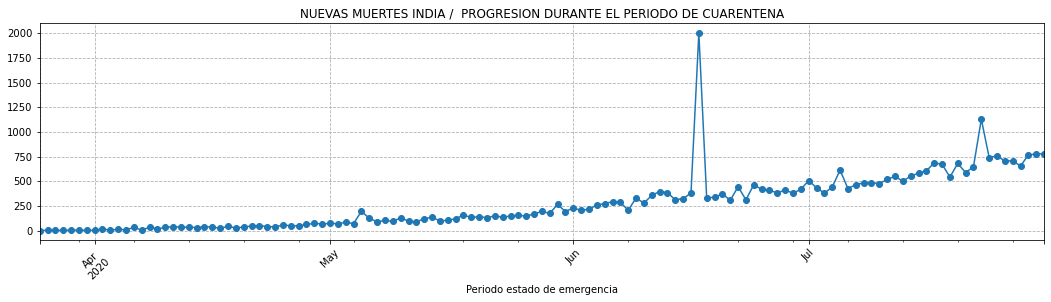

In [115]:
from matplotlib import pyplot as plt
plt.figure(figsize=(18,4))
n_d_india.plot(marker = 'o')
plt.xticks(rotation=45)
plt.xlabel("Periodo estado de emergencia")
plt.title("NUEVAS MUERTES INDIA /  PROGRESION DURANTE EL PERIODO DE CUARENTENA")
plt.grid(linestyle ='dashed')

In [116]:
n_d_peru=n_d.loc["2020-03-16":"2020-06-30","Peru"] #periodo del estado de emergencia en Peru
n_d_peru

date
2020-03-16      0.0
2020-03-17      0.0
2020-03-18      0.0
2020-03-19      0.0
2020-03-20      2.0
              ...  
2020-06-26    175.0
2020-06-27    178.0
2020-06-28    196.0
2020-06-29    182.0
2020-06-30    187.0
Name: Peru, Length: 107, dtype: float64

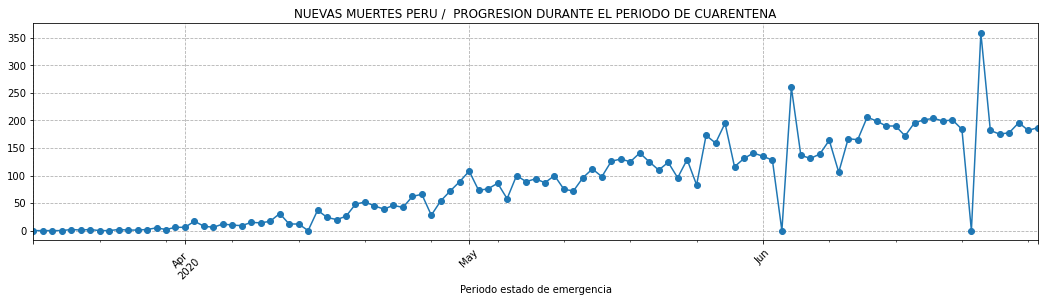

In [117]:
from matplotlib import pyplot as plt
plt.figure(figsize=(18,4))
n_d_peru.plot(marker = 'o')
plt.xticks(rotation=45)
plt.xlabel("Periodo estado de emergencia")
plt.title("NUEVAS MUERTES PERU /  PROGRESION DURANTE EL PERIODO DE CUARENTENA")
plt.grid(linestyle ='dashed')

In [118]:
n_d_spain=n_d.loc["2020-03-15":"2020-05-25","Spain"] #periodo del estado de emergencia en Spain
n_d_spain

date
2020-03-15      15.0
2020-03-16     152.0
2020-03-17      21.0
2020-03-18     182.0
2020-03-19     107.0
               ...  
2020-05-21      52.0
2020-05-22     688.0
2020-05-23      50.0
2020-05-24      74.0
2020-05-25   -1918.0
Name: Spain, Length: 72, dtype: float64

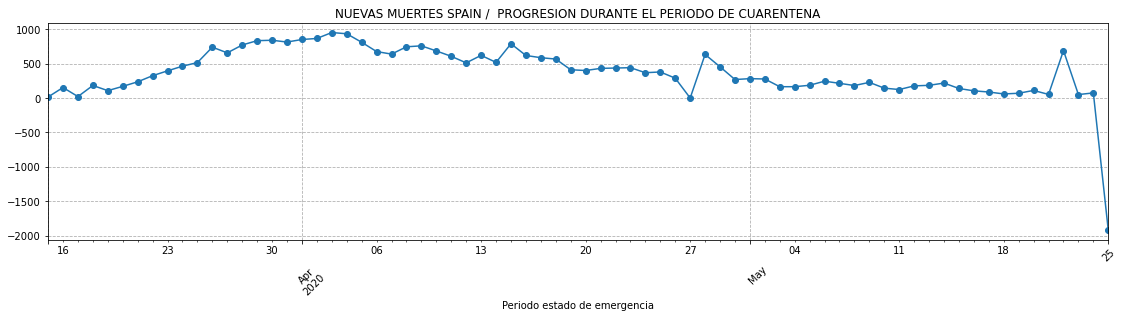

In [119]:
from matplotlib import pyplot as plt
plt.figure(figsize=(19,4))
n_d_spain.plot(marker = 'o')
plt.xticks(rotation=45)
plt.xlabel("Periodo estado de emergencia")
plt.title("NUEVAS MUERTES SPAIN /  PROGRESION DURANTE EL PERIODO DE CUARENTENA")
plt.grid(linestyle ='dashed') 
#El 25 de mayo los datos son negativos por un supuesto ajuste oficial al contabilizar=outlier

In [120]:
import seaborn as sns
Q1=n_d.quantile(0.25)
Q3=n_d.quantile(0.75)
IQR=Q3-Q1
print(IQR)

location
France           240.0
India            396.5
Peru             173.5
Spain            281.0
United States    957.5
dtype: float64


In [121]:
import seaborn as sns
Q1=n_d.quantile(0.25)
Q3=n_d.quantile(0.75)
IQR=Q3-Q1
print(IQR)

location
France           240.0
India            396.5
Peru             173.5
Spain            281.0
United States    957.5
dtype: float64


In [122]:
#$$$$$ Plot con el outlier en la estadística de nuevos casos detectado el día 25-05-2020 cuando se restaron 1918 fallecidos.

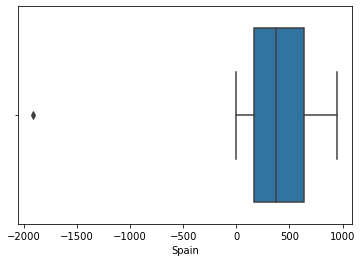

In [123]:
sns.boxplot(x=n_d.loc["2020-03-15":"2020-05-25","Spain"])  

In [124]:
n_d_eeuu=n_d.loc["2020-04-07":"2020-07-31","United States"] #periodo del estado de emergencia en EEUU
n_d_eeuu

date
2020-04-07    1342.0
2020-04-08    1906.0
2020-04-09    1922.0
2020-04-10    1873.0
2020-04-11    2087.0
               ...  
2020-07-27     475.0
2020-07-28    1076.0
2020-07-29    1245.0
2020-07-30    1457.0
2020-07-31    1357.0
Name: United States, Length: 116, dtype: float64

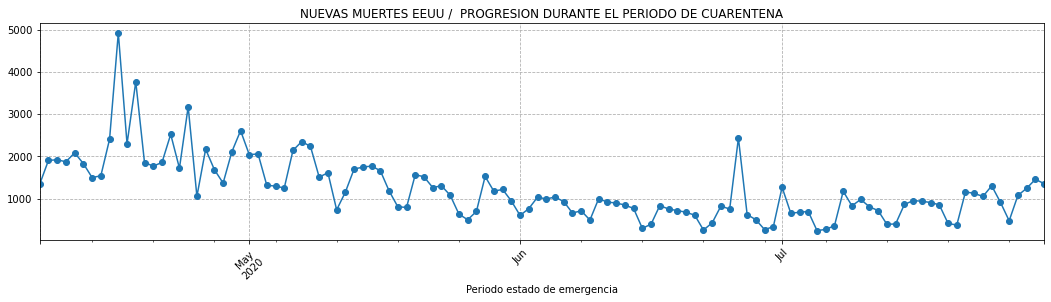

In [125]:
from matplotlib import pyplot as plt
plt.figure(figsize=(18,4))
n_d_eeuu.plot(marker = 'o')
plt.xticks(rotation=45)
plt.xlabel("Periodo estado de emergencia")
plt.title("NUEVAS MUERTES EEUU /  PROGRESION DURANTE EL PERIODO DE CUARENTENA")
plt.grid(linestyle = 'dashed')


In [126]:
data=pd.merge(n_d_france,n_d_peru,on='date',how='outer')
data.sort_values(["date"],ascending=True)

France  Peru
date                    
2020-02-15     1.0   NaN
2020-02-27     1.0   NaN
2020-03-01     0.0   NaN
2020-03-02     0.0   NaN
2020-03-03     1.0   NaN
...            ...   ...
2020-07-06     0.0   NaN
2020-07-07    27.0   NaN
2020-07-08    13.0   NaN
2020-07-09    32.0   NaN
2020-07-10    14.0   NaN

[134 rows x 2 columns]

In [127]:
data2=pd.merge(n_d_india,n_d_spain,on='date',how='outer')
data2.sort_values(["date"],ascending=True)

India  Spain
date                    
2020-03-15    NaN   15.0
2020-03-16    NaN  152.0
2020-03-17    NaN   21.0
2020-03-18    NaN  182.0
2020-03-19    NaN  107.0
...           ...    ...
2020-07-27  708.0    NaN
2020-07-28  654.0    NaN
2020-07-29  768.0    NaN
2020-07-30  775.0    NaN
2020-07-31  779.0    NaN

[139 rows x 2 columns]

In [128]:
data3=pd.merge(data,data2,on='date',how='outer')
data3.sort_values(["date"],ascending=True)

France  Peru  India  Spain
date                                  
2020-02-15     1.0   NaN    NaN    NaN
2020-02-27     1.0   NaN    NaN    NaN
2020-03-01     0.0   NaN    NaN    NaN
2020-03-02     0.0   NaN    NaN    NaN
2020-03-03     1.0   NaN    NaN    NaN
...            ...   ...    ...    ...
2020-07-27     NaN   NaN  708.0    NaN
2020-07-28     NaN   NaN  654.0    NaN
2020-07-29     NaN   NaN  768.0    NaN
2020-07-30     NaN   NaN  775.0    NaN
2020-07-31     NaN   NaN  779.0    NaN

[155 rows x 4 columns]

In [129]:
data4=pd.merge(data3,n_d_eeuu,on='date',how='outer')
data4=data4.fillna(0)

In [130]:
data4=data4.sort_values(["date"],ascending=True)
data4

France  Peru  India  Spain  United States
date                                                 
2020-02-15     1.0   0.0    0.0    0.0            0.0
2020-02-27     1.0   0.0    0.0    0.0            0.0
2020-03-01     0.0   0.0    0.0    0.0            0.0
2020-03-02     0.0   0.0    0.0    0.0            0.0
2020-03-03     1.0   0.0    0.0    0.0            0.0
...            ...   ...    ...    ...            ...
2020-07-27     0.0   0.0  708.0    0.0          475.0
2020-07-28     0.0   0.0  654.0    0.0         1076.0
2020-07-29     0.0   0.0  768.0    0.0         1245.0
2020-07-30     0.0   0.0  775.0    0.0         1457.0
2020-07-31     0.0   0.0  779.0    0.0         1357.0

[155 rows x 5 columns]

In [131]:
data5=data4.max()
data5

France           2004.0
Peru              359.0
India            2003.0
Spain             950.0
United States    4928.0
dtype: float64

In [132]:
data5=data5.sort_values(ascending=False)

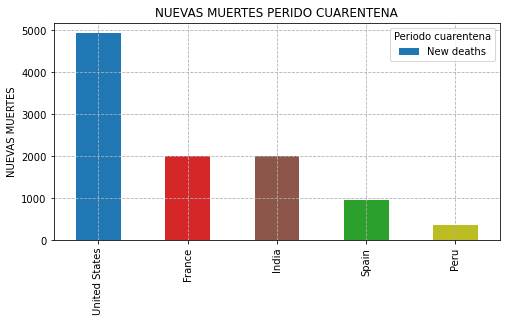

In [133]:
from matplotlib import pyplot as plt
colores_paises = ["#1f77b4","#d62728","#8c564b","#2ca02c","#bcbd22"]
plt.figure(figsize=(8,4))
data5.plot(kind='bar',color=colores_paises,label="New deaths")
plt.legend(title="Periodo cuarentena")
plt.ylabel("NUEVAS MUERTES")
plt.title("NUEVAS MUERTES PERIDO CUARENTENA")
plt.grid(linestyle = 'dashed')

#GRAFICA DE NUEVAS MUERTES PRODUCIDAS DURANTE EL PERIODO DE CUARETENAS DE LOS PAISES. EN LA TABLA RESUME LO QUE OCURRIO EN CADA PAIS 


In [134]:

# @joseMaria 
# JMGONB
#$$$$$$$$$$$$$$$$ TABLAS Y PLOTS RELACIONADOS CON RECUPERACIONES DE CASOS COVID 19$$$$$$$$$$$$$$$$$$$$$$$

 #*Total de recuperaciones por día  Covid 19 en los 5 paises seleccionados. Datos que se van actualizando a la fecha actual

In [135]:
total_cas

location
United States    4941796.0
India            2088611.0
Peru              463875.0
Spain             314362.0
France            197921.0
Name: 2020-08-08 00:00:00, dtype: float64

In [136]:
total_dead

location
United States    161356.0
India             42518.0
France            30324.0
Spain             28503.0
Peru              20649.0
Name: 2020-08-08 00:00:00, dtype: float64

In [137]:
recuperados=total_cas-total_dead

In [138]:
recuperados

location
France            167597.0
India            2046093.0
Peru              443226.0
Spain             285859.0
United States    4780440.0
Name: 2020-08-08 00:00:00, dtype: float64

In [139]:
recuperados=recuperados.sort_values(ascending=False)

Text(0.5, 1.0, 'RECUPERACIONES TOTALES')

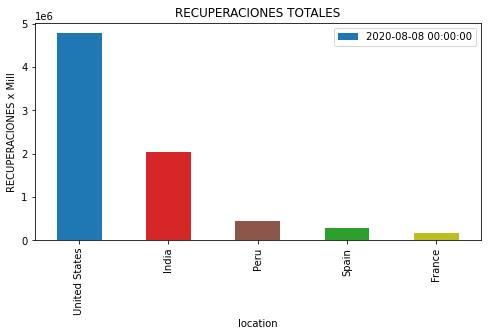

In [140]:
from matplotlib import pyplot as plt
colores_paises = ["#1f77b4","#d62728","#8c564b","#2ca02c","#bcbd22"]
plt.figure(figsize=(8,4))
recuperados.plot(kind='bar',color=colores_paises)
plt.legend(loc=2, fontsize = 'xx-small')
plt.legend()
plt.ylabel("RECUPERACIONES x Mill")
plt.title("RECUPERACIONES TOTALES")


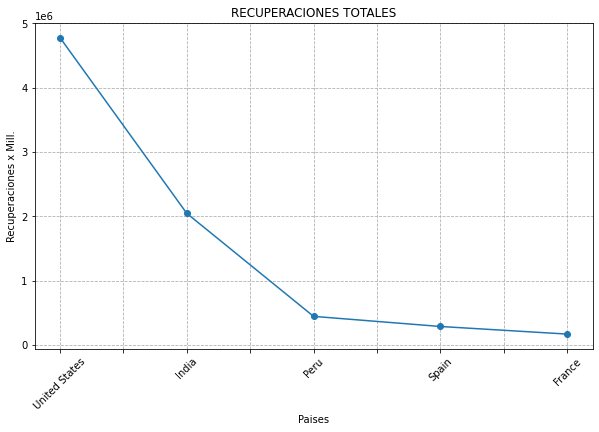

In [141]:
from matplotlib import pyplot as plt
plt.figure(figsize=(10,6))
recuperados.plot(marker = 'o')
plt.xticks(rotation=45)
plt.xlabel("Paises")
plt.ylabel("Recuperaciones x Mill.")
plt.title("RECUPERACIONES TOTALES")
plt.grid(linestyle = 'dashed')

In [142]:
x=recuperados.sum()
x=int(x)
x


7723215

<function matplotlib.pyplot.show(*args, **kw)>

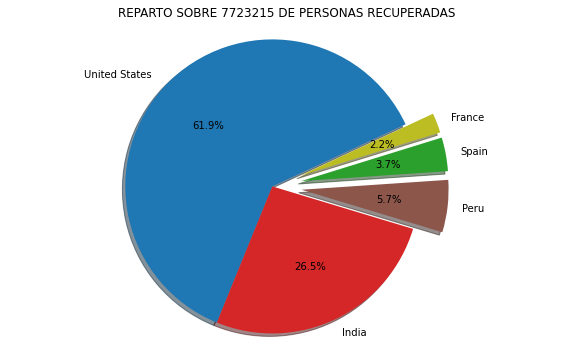

In [143]:
from matplotlib import pyplot
plt.figure(figsize=(10,6))
pais=("United States ","India ","Peru ","Spain","France")
recuperacion=recuperados
colores_paises = ["#1f77b4","#d62728","#8c564b","#2ca02c","#bcbd22"]
desfase=(0.0,0.0,0.2,0.2,0.2)
pyplot.pie(recuperacion,labels=pais,colors=colores_paises,autopct="%1.1f%%",shadow=True,startangle=25,explode=desfase)
pyplot.axis("equal")
pyplot.title("REPARTO SOBRE "+str(x)+" DE PERSONAS RECUPERADAS")
pyplot.show

In [144]:

# @joseMaria 
# JMGONB
#$$$$$$$$$$$$$$$$ TABLAS Y PLOTS RELACIONADOS TOTAL CASOS VS TOTAL MUERTES EN LOS 5 PAISES $$$$$$$$$$$$$$$$$$$$$$$

 #*Total de casos actualizado y comparativa con total muertes. diagrama de barras con los 5 paises.

In [145]:
total_cas_total_dead=pd.merge(total_cas,total_dead,on='location',how='outer')
total_cas_total_dead=total_cas_total_dead.fillna(0)

In [146]:
total_cas_total_dead.columns=["Total casos","Total muertes"]

In [147]:
total_cas_total_dead

Total casos  Total muertes
location                                 
United States    4941796.0       161356.0
India            2088611.0        42518.0
Peru              463875.0        20649.0
Spain             314362.0        28503.0
France            197921.0        30324.0

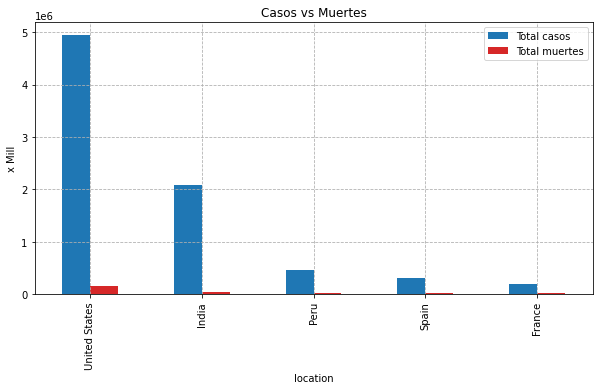

In [148]:
from matplotlib import pyplot as plt
import numpy as np
colores_paises = ["#1f77b4","#d62728","#8c564b","#2ca02c","#bcbd22"]
total_cas_total_dead.plot(figsize=(10,5),kind='bar',color=colores_paises)
plt.legend()
plt.grid(linestyle = 'dashed')
plt.ylabel("x Mill")
plt.title("Casos vs Muertes")
plt.show()

In [149]:
n_d

location    France  India   Peru  Spain  United States
date                                                  
2020-02-15     1.0    0.0    0.0    0.0            0.0
2020-02-27     1.0    0.0    0.0    0.0            0.0
2020-03-01     0.0    0.0    0.0    0.0            1.0
2020-03-02     0.0    0.0    0.0    0.0            1.0
2020-03-03     1.0    0.0    0.0    0.0            4.0
...            ...    ...    ...    ...            ...
2020-08-04    29.0  803.0  197.0   26.0          543.0
2020-08-05     2.0  857.0  196.0    1.0         1403.0
2020-08-06     9.0  904.0  221.0    1.0         1450.0
2020-08-07     7.0  886.0  196.0    3.0         1848.0
2020-08-08    12.0  933.0  225.0    0.0         1252.0

[163 rows x 5 columns]

In [150]:

# @joseMaria 
# JMGONB
#$$$$$$$$$$$$$$$$ TABLAS Y PLOTS MOSTRANDO LINEAS VERTICALES QUE DELIMITAN PERIODOS DE CUARENTENAS $$$$$$$$$$$$$$$$$$$$$$$

In [151]:
fr=n_d.iloc[:,0]
fr

date
2020-02-15     1.0
2020-02-27     1.0
2020-03-01     0.0
2020-03-02     0.0
2020-03-03     1.0
              ... 
2020-08-04    29.0
2020-08-05     2.0
2020-08-06     9.0
2020-08-07     7.0
2020-08-08    12.0
Name: France, Length: 163, dtype: float64

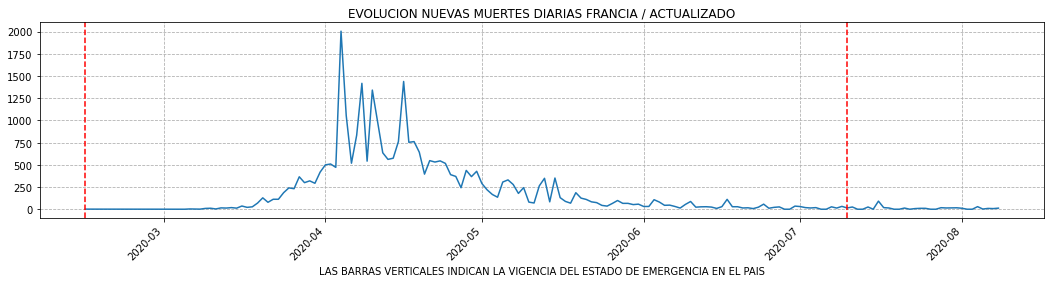

In [152]:
from matplotlib import pyplot as plt
plt.figure(figsize=(18,4))
fr.plot()
plt.xticks(rotation=45)
plt.xlabel("LAS BARRAS VERTICALES INDICAN LA VIGENCIA DEL ESTADO DE EMERGENCIA EN EL PAIS")
plt.title("EVOLUCION NUEVAS MUERTES DIARIAS FRANCIA / ACTUALIZADO")
plt.grid(linestyle ='dashed')
xposition=["2020-02-15 ","2020-07-10 "]
for c in xposition:
    plt.axvline(x=c,color="r",linestyle="--")

In [153]:
ind=n_d.iloc[:,1]
ind

date
2020-02-15      0.0
2020-02-27      0.0
2020-03-01      0.0
2020-03-02      0.0
2020-03-03      0.0
              ...  
2020-08-04    803.0
2020-08-05    857.0
2020-08-06    904.0
2020-08-07    886.0
2020-08-08    933.0
Name: India, Length: 163, dtype: float64

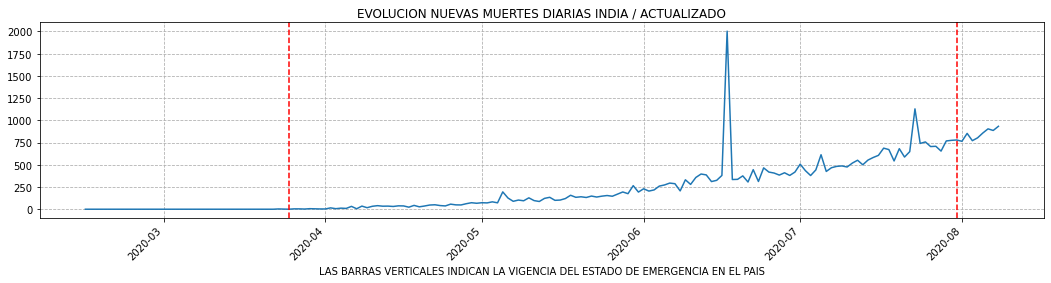

In [154]:
from matplotlib import pyplot as plt
plt.figure(figsize=(18,4))
ind.plot()
plt.xticks(rotation=45)
plt.xlabel("LAS BARRAS VERTICALES INDICAN LA VIGENCIA DEL ESTADO DE EMERGENCIA EN EL PAIS")
plt.title("EVOLUCION NUEVAS MUERTES DIARIAS INDIA / ACTUALIZADO")
plt.grid(linestyle ='dashed')
xposition=["2020-03-25 ","2020-07-31 "]
for c in xposition:
    plt.axvline(x=c,color="r",linestyle="--")

In [155]:
per=n_d.iloc[:,2]
per

date
2020-02-15      0.0
2020-02-27      0.0
2020-03-01      0.0
2020-03-02      0.0
2020-03-03      0.0
              ...  
2020-08-04    197.0
2020-08-05    196.0
2020-08-06    221.0
2020-08-07    196.0
2020-08-08    225.0
Name: Peru, Length: 163, dtype: float64

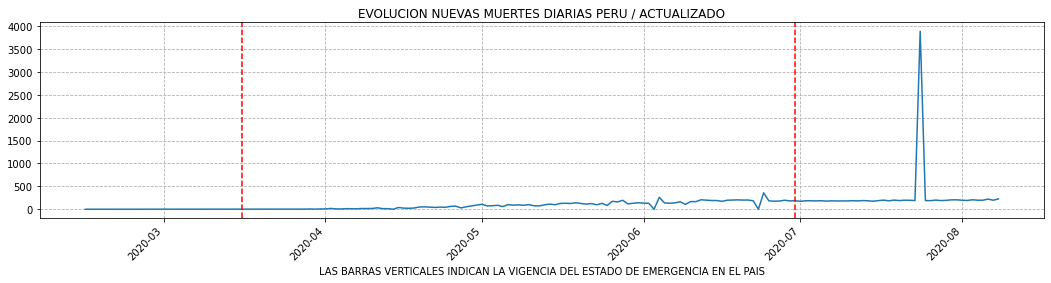

In [156]:
from matplotlib import pyplot as plt
plt.figure(figsize=(18,4))
per.plot()
plt.xticks(rotation=45)
plt.xlabel("LAS BARRAS VERTICALES INDICAN LA VIGENCIA DEL ESTADO DE EMERGENCIA EN EL PAIS")
plt.title("EVOLUCION NUEVAS MUERTES DIARIAS PERU / ACTUALIZADO")
plt.grid(linestyle ='dashed')
xposition=["2020-03-16 ","2020-06-30 "]
for c in xposition:
    plt.axvline(x=c,color="r",linestyle="--")

In [157]:
esp=n_d.iloc[:,3]
esp

date
2020-02-15     0.0
2020-02-27     0.0
2020-03-01     0.0
2020-03-02     0.0
2020-03-03     0.0
              ... 
2020-08-04    26.0
2020-08-05     1.0
2020-08-06     1.0
2020-08-07     3.0
2020-08-08     0.0
Name: Spain, Length: 163, dtype: float64

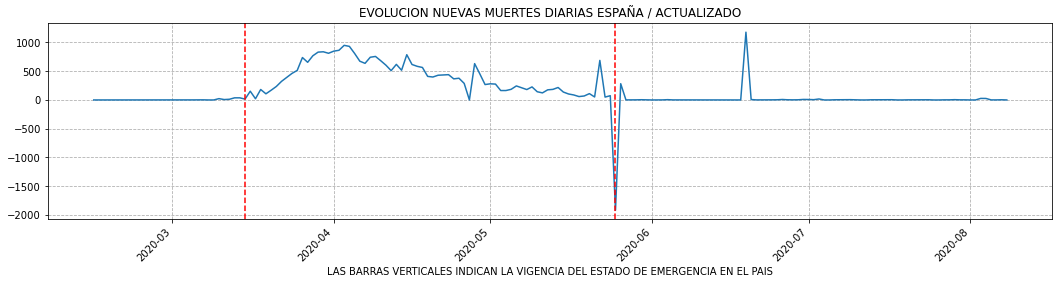

In [158]:
from matplotlib import pyplot as plt
plt.figure(figsize=(18,4))
esp.plot()
plt.xticks(rotation=45)
plt.xlabel("LAS BARRAS VERTICALES INDICAN LA VIGENCIA DEL ESTADO DE EMERGENCIA EN EL PAIS")
plt.title("EVOLUCION NUEVAS MUERTES DIARIAS ESPAÑA / ACTUALIZADO")
plt.grid(linestyle ='dashed')
xposition=["2020-03-15 ","2020-05-25 "]
for c in xposition:
    plt.axvline(x=c,color="r",linestyle="--")


In [159]:
eu=n_d.iloc[:,4]
eu

date
2020-02-15       0.0
2020-02-27       0.0
2020-03-01       1.0
2020-03-02       1.0
2020-03-03       4.0
               ...  
2020-08-04     543.0
2020-08-05    1403.0
2020-08-06    1450.0
2020-08-07    1848.0
2020-08-08    1252.0
Name: United States, Length: 163, dtype: float64

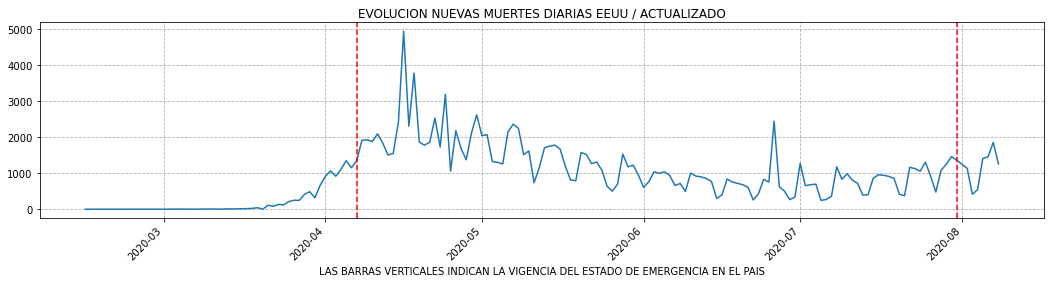

In [160]:
from matplotlib import pyplot as plt
plt.figure(figsize=(18,4))
eu.plot()
plt.xticks(rotation=45)
plt.xlabel("LAS BARRAS VERTICALES INDICAN LA VIGENCIA DEL ESTADO DE EMERGENCIA EN EL PAIS")
plt.title("EVOLUCION NUEVAS MUERTES DIARIAS EEUU / ACTUALIZADO")
plt.grid(linestyle ='dashed')
xposition=["2020-04-07 ","2020-07-31 "]
for c in xposition:
    plt.axvline(x=c,color="r",linestyle="--")

In [161]:
# @joseMaria 
# JMGONB

#$$$$$$$$$$$$$$$$ TABLAS Y PLOTS DE PORCENTAJES DE MUERTES Y RECUPERADOS  VS CASOS TOTALES DE CASOS COVID 19$$$$$$$$$$$$$$$$$$$$$$$

In [162]:
porct_1=total_cas_total_dead

In [163]:
porct_1

Total casos  Total muertes
location                                 
United States    4941796.0       161356.0
India            2088611.0        42518.0
Peru              463875.0        20649.0
Spain             314362.0        28503.0
France            197921.0        30324.0

In [164]:
recuperados

location
United States    4780440.0
India            2046093.0
Peru              443226.0
Spain             285859.0
France            167597.0
Name: 2020-08-08 00:00:00, dtype: float64

In [165]:
porcentaje=pd.merge(left=porct_1,right=recuperados,how="inner",on="location")

In [166]:
porcentaje.columns=["Total casos","Total muertes","Total recuperaciones"]

In [167]:
porcentaje

Total casos  Total muertes  Total recuperaciones
location                                                       
United States    4941796.0       161356.0             4780440.0
India            2088611.0        42518.0             2046093.0
Peru              463875.0        20649.0              443226.0
Spain             314362.0        28503.0              285859.0
France            197921.0        30324.0              167597.0

In [168]:
porcentaje1=porcentaje.iloc[:,0]

In [169]:
porcentaje1

location
United States    4941796.0
India            2088611.0
Peru              463875.0
Spain             314362.0
France            197921.0
Name: Total casos, dtype: float64

In [170]:
porcentaje2=porcentaje.iloc[:,1]

In [171]:
porcentaje2

location
United States    161356.0
India             42518.0
Peru              20649.0
Spain             28503.0
France            30324.0
Name: Total muertes, dtype: float64

In [172]:
porcentaje3=porcentaje.iloc[:,2]

In [173]:
porcentaje_muertes_casos=porcentaje2*100/porcentaje1

In [174]:
porcentaje_muertes_casos
porcentaje_muertes_casos.round(2)

location
United States     3.27
India             2.04
Peru              4.45
Spain             9.07
France           15.32
dtype: float64

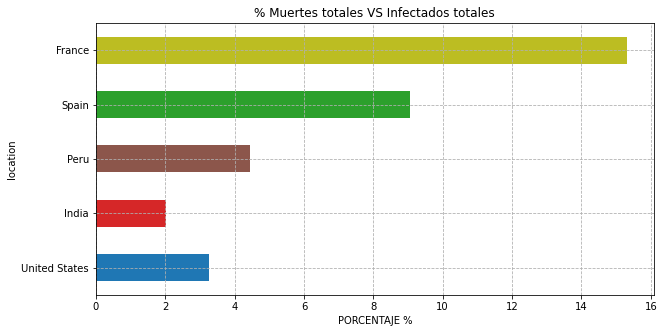

In [175]:
from matplotlib import pyplot as plt
import numpy as np
colores_paises = ["#1f77b4","#d62728","#8c564b","#2ca02c","#bcbd22"]
fig=plt.figure
porcentaje_muertes_casos.plot(figsize=(10,5),kind='barh',color=colores_paises)
plt.title("% Muertes totales VS Infectados totales")
plt.grid(linestyle ='dashed')
plt.xlabel("PORCENTAJE %")
plt.show()


In [176]:
porcentaje_recuperados_casos=porcentaje3*100/porcentaje1

In [177]:
porcentaje_recuperados_casos
porcentaje_recuperados_casos.round(2)

location
United States    96.73
India            97.96
Peru             95.55
Spain            90.93
France           84.68
dtype: float64

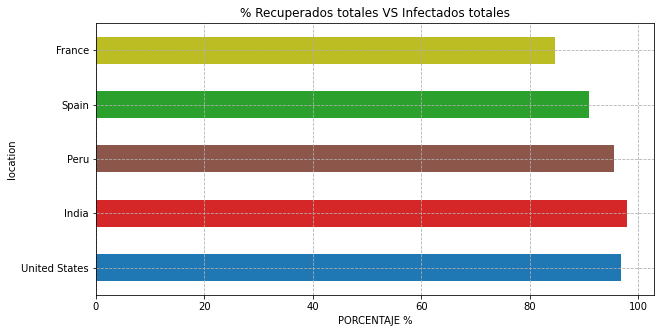

In [178]:
from matplotlib import pyplot as plt
import numpy as np
colores_paises = ["#1f77b4","#d62728","#8c564b","#2ca02c","#bcbd22"]
fig=plt.figure
porcentaje_recuperados_casos.plot(figsize=(10,5),kind='barh',color=colores_paises)
plt.title("% Recuperados totales VS Infectados totales")
plt.grid(linestyle ='dashed')
plt.xlabel("PORCENTAJE %")
plt.show()

In [179]:
# @joseMaria 
# JMGONB

#$$$$$$$$$$$$$$$$ TABLAS Y PLOTS MUERTES DIARIAS DE CADA PAIS CON UN COLOR EN TENDENCIA ESCENDENTE Y OTRO EN TENDENCIA DESCENDENTE#   $$$$$$$$$$$$$$$$$$$$$$$
#Muestro en un primer  gráfico el periodo de cada pais desde 15-02-20 hasta fecha actual para ver cuando comenzó a subir y luego a bajar-
#En un segundo gráfico hago la muestra de la curva de ese perido con diferentes colores.

In [180]:
curva_france=n_d.iloc[:,0]
curva_france
#Sacamos todos los datos para indagar en que momento se produce una tendencia descendenta de manera consolidada.

date
2020-02-15     1.0
2020-02-27     1.0
2020-03-01     0.0
2020-03-02     0.0
2020-03-03     1.0
              ... 
2020-08-04    29.0
2020-08-05     2.0
2020-08-06     9.0
2020-08-07     7.0
2020-08-08    12.0
Name: France, Length: 163, dtype: float64

In [181]:
datos_france=n_d.loc["2020-03-19":"2020-04-30", "France"]
datos_france
 #Se considera que comienza a  subir el 20-03-2020 y después de varios repuntes por encima de 1000 muertes, el 17-04-2020 comienza a bajar la tendencia.

date
2020-03-19      69.0
2020-03-20     128.0
2020-03-21      78.0
2020-03-22     112.0
2020-03-23     112.0
2020-03-24     186.0
2020-03-25     240.0
2020-03-26     231.0
2020-03-27     365.0
2020-03-28     299.0
2020-03-29     319.0
2020-03-30     292.0
2020-03-31     418.0
2020-04-01     499.0
2020-04-02     509.0
2020-04-03     471.0
2020-04-04    2004.0
2020-04-05    1053.0
2020-04-06     518.0
2020-04-07     833.0
2020-04-08    1417.0
2020-04-09     541.0
2020-04-10    1341.0
2020-04-11     987.0
2020-04-12     635.0
2020-04-13     561.0
2020-04-14     574.0
2020-04-15     762.0
2020-04-16    1438.0
2020-04-17     753.0
2020-04-18     761.0
2020-04-19     642.0
2020-04-20     395.0
2020-04-21     547.0
2020-04-22     531.0
2020-04-23     544.0
2020-04-24     516.0
2020-04-25     389.0
2020-04-26     369.0
2020-04-27     242.0
2020-04-28     437.0
2020-04-29     367.0
2020-04-30     427.0
Name: France, dtype: float64

In [182]:

# @joseMaria 
# JMGONB
#$$$$ Francia muertes por día 15-02-2020 a día atual.$$$$$$$

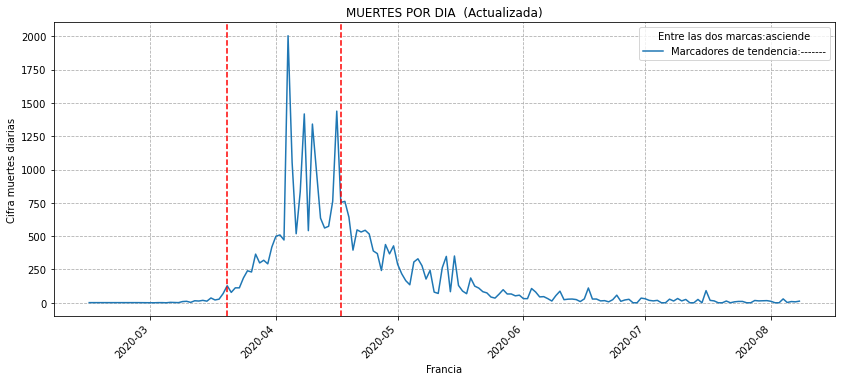

In [183]:
from matplotlib import pyplot as plt
plt.figure(figsize=(14,6))
curva_france.plot(label="Marcadores de tendencia:-------")
plt.xticks(rotation=45)
plt.legend(title="Entre las dos marcas:asciende")
plt.xlabel("Francia")
plt.ylabel("Cifra muertes diarias")
plt.title("MUERTES POR DIA  (Actualizada)")
plt.grid(linestyle = 'dashed')
xposition=["2020-03-20 ","2020-04-17 "] 
for c in xposition:
    plt.axvline(x=c,color="r",linestyle="--")

In [184]:
# @joseMaria 
# JMGONB
#$$$$ Francia muertes por día 20-03-2020 a día 17-04-2020. que es el día que sucede una inflexion y comienza a bajar.$$$$$$$

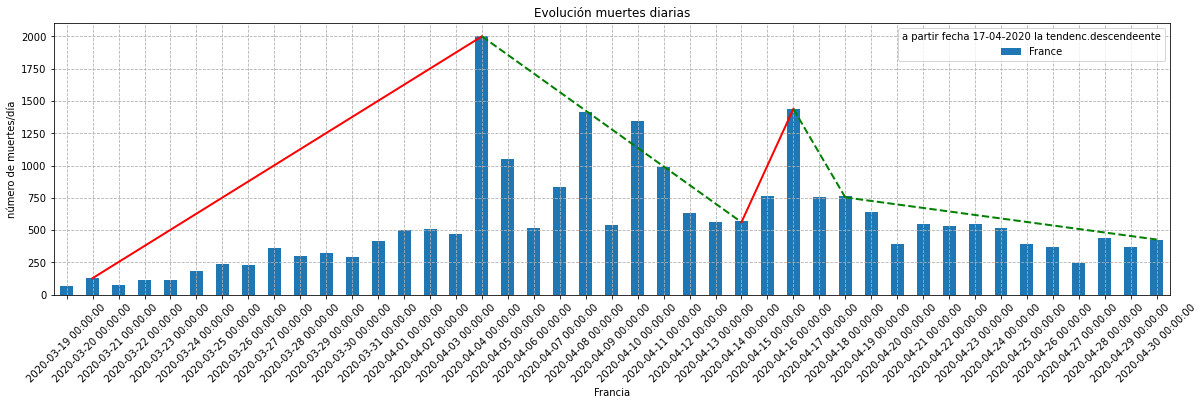

In [185]:
from matplotlib import pyplot as plt
plt.figure(figsize=(20,5))
datos_france.plot(kind='bar')
plt.legend(title="a partir fecha 17-04-2020 la tendenc.descendeente")
plt.xticks(rotation=45)
plt.grid(linestyle ='dashed')
plt.xlabel("Francia")
plt.ylabel("número de muertes/día")
plt.title("Evolución muertes diarias")
plt.plot ([1 ,16], [ 128,2000 ],lw = 2,color='r')
plt.plot ([16 ,26], [ 2000,561 ],lw = 2,color='g',linestyle="--")
plt.plot ([26 ,28], [561,1438],lw = 2,color='r')
plt.plot ([28 ,30], [1438,753],lw = 2,color='g',linestyle="--")
plt.plot ([30 ,42], [753,427],lw = 2,color='g',linestyle="--")


In [186]:
# @joseMaria 
# JMGONB

#$$$$ India muertes por día 15-02-2020 a día atual.$$$$$$$

In [187]:
curva_india=n_d.iloc[:,1]
curva_india
#Sacamos todos los datos para indagar en que momento se produce una tendencia descendenta de manera consolidada.

date
2020-02-15      0.0
2020-02-27      0.0
2020-03-01      0.0
2020-03-02      0.0
2020-03-03      0.0
              ...  
2020-08-04    803.0
2020-08-05    857.0
2020-08-06    904.0
2020-08-07    886.0
2020-08-08    933.0
Name: India, Length: 163, dtype: float64

In [188]:
datos_india=n_d.loc["2020-04-02":"2020-08-07","India" ] 
datos_india

date
2020-04-02     15.0
2020-04-03      6.0
2020-04-04     12.0
2020-04-05      9.0
2020-04-06     32.0
              ...  
2020-08-03    771.0
2020-08-04    803.0
2020-08-05    857.0
2020-08-06    904.0
2020-08-07    886.0
Name: India, Length: 128, dtype: float64

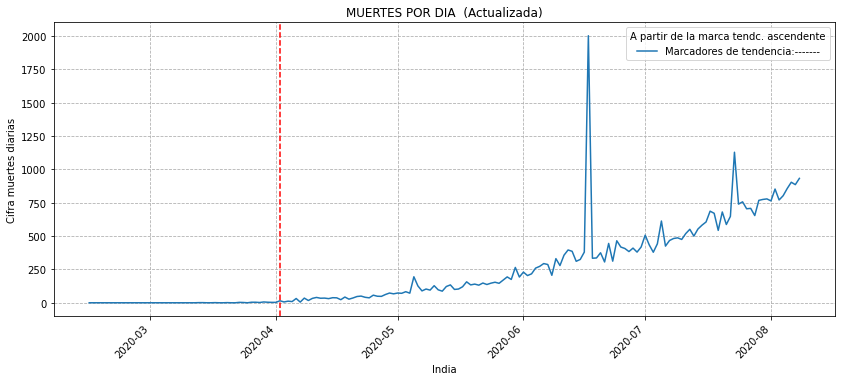

In [189]:
from matplotlib import pyplot as plt
plt.figure(figsize=(14,6))
curva_india.plot(label="Marcadores de tendencia:-------")
plt.xticks(rotation=45)
plt.legend(title="A partir de la marca tendc. ascendente")
plt.xlabel("India")
plt.ylabel("Cifra muertes diarias")
plt.title("MUERTES POR DIA  (Actualizada)")
plt.grid(linestyle = 'dashed')
xposition=["2020-04-02 "] 
for c in xposition:
    plt.axvline(x=c,color="r",linestyle="--")


In [190]:
# @joseMaria 
# JMGONB
#$$$$ India muertes desde el día 02-04-2020  que no han dejado de descender.$$$$$$$

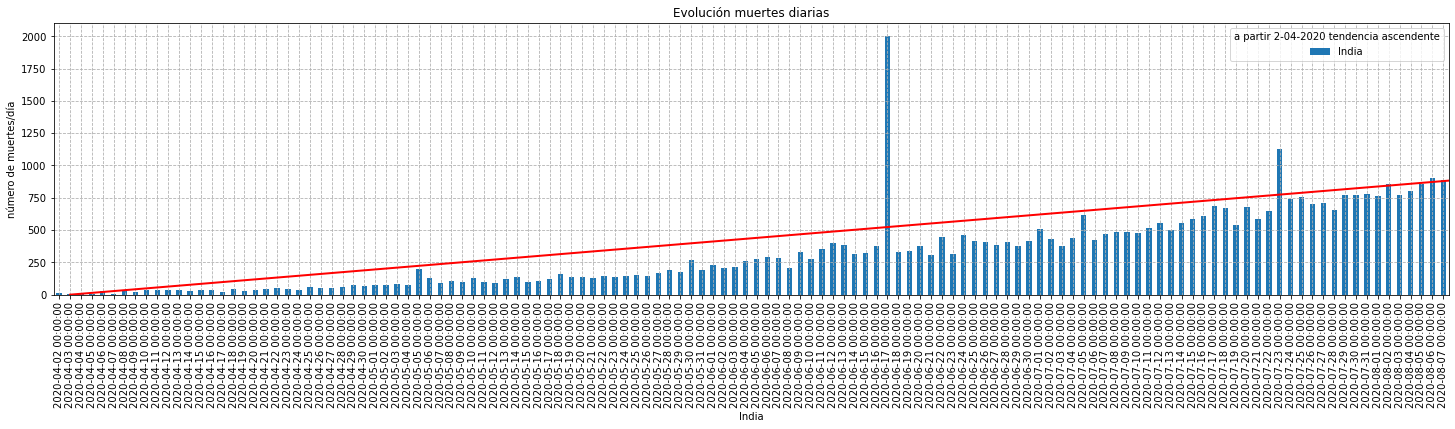

In [191]:
from matplotlib import pyplot as plt
plt.figure(figsize=(25,5))
datos_india.plot(kind='bar')
plt.legend(title="a partir 2-04-2020 tendencia ascendente")
plt.xticks()
plt.grid(linestyle ='dashed')
plt.ylabel("número de muertes/día")
plt.title("Evolución muertes diarias")
plt.xlabel("India")
plt.plot ([1 ,128], [0,886],lw = 2,color='r')


In [192]:
# @joseMaria 
# JMGONB
#$$$$ Peru muertes por día 15-02-2020 a día atual.$$$$$$$

In [193]:
curva_peru=n_d.iloc[:,2]
curva_Peru

NameError: name 'curva_Peru' is not defined

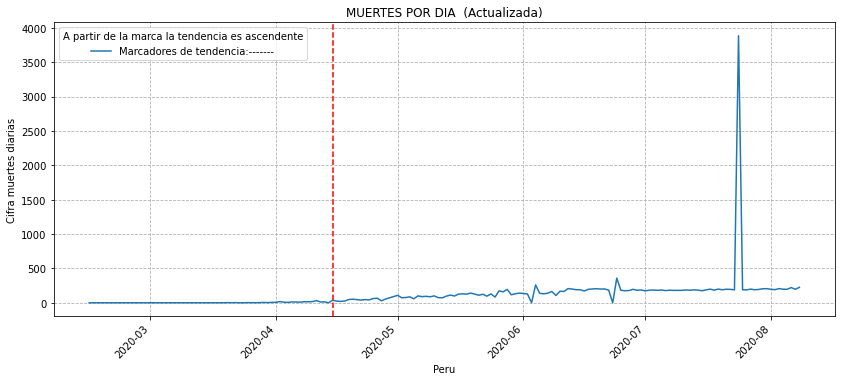

In [194]:
from matplotlib import pyplot as plt
plt.figure(figsize=(14,6))
curva_peru.plot(label="Marcadores de tendencia:-------")
plt.xticks(rotation=45)
plt.legend(title="A partir de la marca la tendencia es ascendente")
plt.xlabel("Peru")
plt.ylabel("Cifra muertes diarias")
plt.title("MUERTES POR DIA  (Actualizada)")
plt.grid(linestyle = 'dashed')
xposition=["2020-04-15"] 
for c in xposition:
    plt.axvline(x=c,color="r",linestyle="--")

In [195]:
# @joseMaria 
# JMGONB
#$$$$ Perú muertes desde el día 15-04-2020  que no han dejado de descender hasta el 24-07-2020 fecha en la que tenemos un outlier sospechoso que mostramos en el último plot de este punto..$$$$$$$

In [196]:
datos_peru=n_d.loc["2020-04-15":"2020-08-07","Peru" ] 
datos_peru

date
2020-04-15     37.0
2020-04-16     24.0
2020-04-17     20.0
2020-04-18     26.0
2020-04-19     48.0
              ...  
2020-08-03    206.0
2020-08-04    197.0
2020-08-05    196.0
2020-08-06    221.0
2020-08-07    196.0
Name: Peru, Length: 115, dtype: float64

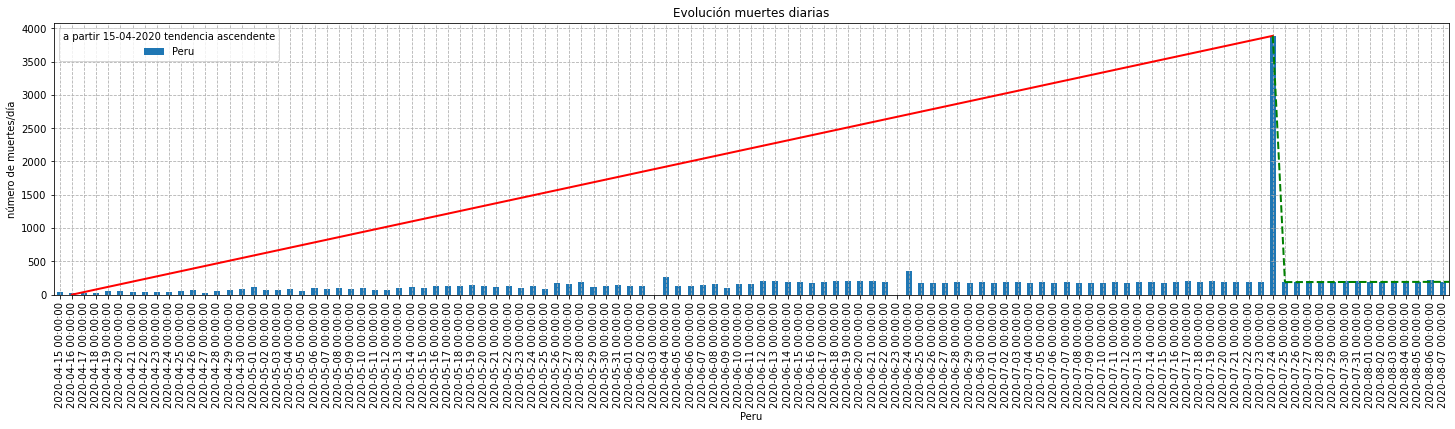

In [197]:
from matplotlib import pyplot as plt
plt.figure(figsize=(25,5))
datos_peru.plot(kind='bar')
plt.legend(title="a partir 15-04-2020 tendencia ascendente")
plt.xticks()
plt.grid(linestyle ='dashed')
plt.ylabel("número de muertes/día")
plt.title("Evolución muertes diarias")
plt.xlabel("Peru")
plt.plot ([1 ,100], [0,3887],lw = 2,color='r')
plt.plot ([100 ,101], [3887,189],lw = 2,color='g',linestyle="--")
plt.plot ([101 ,128], [189,196],lw = 2,color='g',linestyle="--")

In [198]:
#$$$$$$$$$$$$$$$$$$$$$$$$$$$$ Peru---Outlier sospechoso con fecha 24-07-2020 (Muertos en ese dia 3887 personas) $$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$

In [199]:
import seaborn as sns
Q1=datos_peru.quantile(0.25)
Q3=datos_peru.quantile(0.75)
IQR=Q3-Q1
print(IQR)

93.5


In [200]:
out2=datos_peru[((datos_peru< (Q1-1.5*IQR))|(datos_peru>(Q3 + 2*IQR))).any(axis=0)]

No handles with labels found to put in legend.


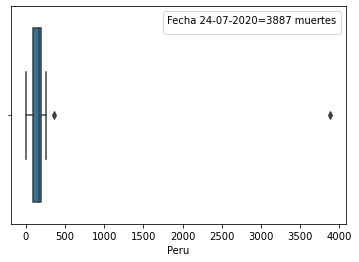

In [201]:
sns.boxplot(x=datos_peru.loc["2020-04-15":"2020-08-07"])
plt.legend(title="Fecha 24-07-2020=3887 muertes")

In [202]:
# @joseMaria 
# JMGONB
#$$$$ España muertes por día 15-02-2020 a día atual.$$$$$$$

In [203]:
curva_españa=n_d.iloc[:,3]
curva_españa

date
2020-02-15     0.0
2020-02-27     0.0
2020-03-01     0.0
2020-03-02     0.0
2020-03-03     0.0
              ... 
2020-08-04    26.0
2020-08-05     1.0
2020-08-06     1.0
2020-08-07     3.0
2020-08-08     0.0
Name: Spain, Length: 163, dtype: float64

In [204]:
datos_españa=n_d.loc["2020-03-15":"2020-06-19","Spain" ] 
datos_españa

date
2020-03-15      15.0
2020-03-16     152.0
2020-03-17      21.0
2020-03-18     182.0
2020-03-19     107.0
               ...  
2020-06-15       0.0
2020-06-16       0.0
2020-06-17       0.0
2020-06-18       0.0
2020-06-19    1179.0
Name: Spain, Length: 97, dtype: float64

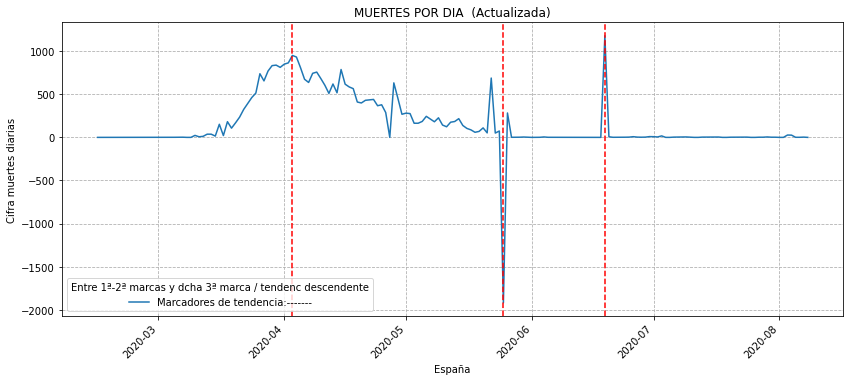

In [205]:
from matplotlib import pyplot as plt
plt.figure(figsize=(14,6))
curva_españa.plot(label="Marcadores de tendencia:-------")
plt.xticks(rotation=45)
plt.legend(title="Entre 1ª-2ª marcas y dcha 3ª marca / tendenc descendente")
plt.xlabel("España")
plt.ylabel("Cifra muertes diarias")
plt.title("MUERTES POR DIA  (Actualizada)")
plt.grid(linestyle = 'dashed')
xposition=["2020-04-03","2020-05-25","2020-06-19"]
for c in xposition:
    plt.axvline(x=c,color="r",linestyle="--")

In [206]:
# @joseMaria 
# JMGONB
#$$$$$$$$$$$$$$ España muertes desde el día 15-03-2020  hasta el 19-06-2020. Tenemos un outlier, y dias en los que los datos son sin muertes porque la administración no notificaba cifras actualizadas.$$$$$$$$$$$$$$

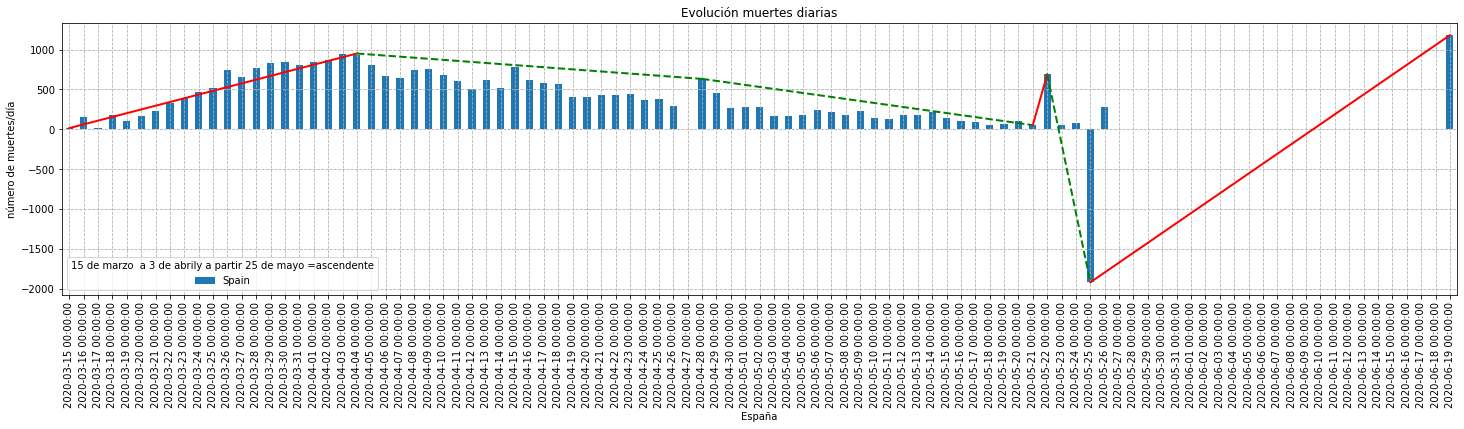

In [207]:
from matplotlib import pyplot as plt
plt.figure(figsize=(25,5))
datos_españa.plot(kind='bar')
plt.legend(title="15 de marzo  a 3 de abrily a partir 25 de mayo =ascendente")
plt.xticks()
plt.grid(linestyle ='dashed')
plt.ylabel("número de muertes/día")
plt.title("Evolución muertes diarias")
plt.xlabel("España")
plt.plot ([0 ,20], [15,950],lw = 2,color='r')
plt.plot ([20 ,44], [950,632],lw = 2,color='g',linestyle="--")
plt.plot ([44 ,67], [632,52],lw = 2,color='g',linestyle="--")
plt.plot ([67 ,68], [52,688],lw = 2,color='r')
plt.plot ([68 ,71], [688,-1918],lw = 2,color='g',linestyle="--")
plt.plot ([71 ,96], [-1918,1179],lw = 2,color='r')

In [208]:
# @joseMaria 
# JMGONB
#$$$$ EEUU muertes por día 15-02-2020 a día atual.$$$$$$$

In [209]:
curva_EEUU=n_d.iloc[:,4]
curva_EEUU

date
2020-02-15       0.0
2020-02-27       0.0
2020-03-01       1.0
2020-03-02       1.0
2020-03-03       4.0
               ...  
2020-08-04     543.0
2020-08-05    1403.0
2020-08-06    1450.0
2020-08-07    1848.0
2020-08-08    1252.0
Name: United States, Length: 163, dtype: float64

In [210]:
datos_EEUU=n_d.loc["2020-03-23":"2020-07-01","United States"]
datos_EEUU					


date
2020-03-23     131.0
2020-03-24     119.0
2020-03-25     211.0
2020-03-26     249.0
2020-03-27     246.0
               ...  
2020-06-27     623.0
2020-06-28     500.0
2020-06-29     265.0
2020-06-30     336.0
2020-07-01    1270.0
Name: United States, Length: 101, dtype: float64

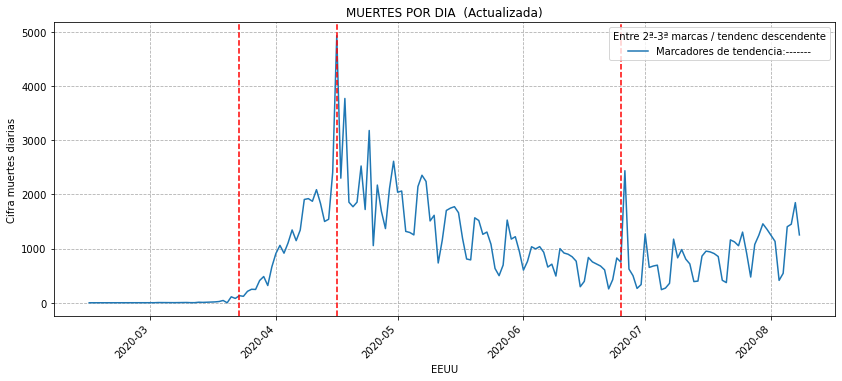

In [211]:
from matplotlib import pyplot as plt
plt.figure(figsize=(14,6))
curva_EEUU.plot(label="Marcadores de tendencia:-------")
plt.xticks(rotation=45)
plt.legend(title="Entre 2ª-3ª marcas / tendenc descendente")
plt.xlabel("EEUU")
plt.ylabel("Cifra muertes diarias")
plt.title("MUERTES POR DIA  (Actualizada)")
plt.grid(linestyle = 'dashed')
xposition=["2020-03-23","2020-04-16","2020-06-25"]
for c in xposition:
    plt.axvline(x=c,color="r",linestyle="--")

In [212]:
# @joseMaria 
# JMGONB
#$$$$$$$$$$$$$$ EEUU muertes desde 23-03-2020 a 1-07-2020 /del 3 a 23 de marzo y a partir 25 de junio=ascendiente"

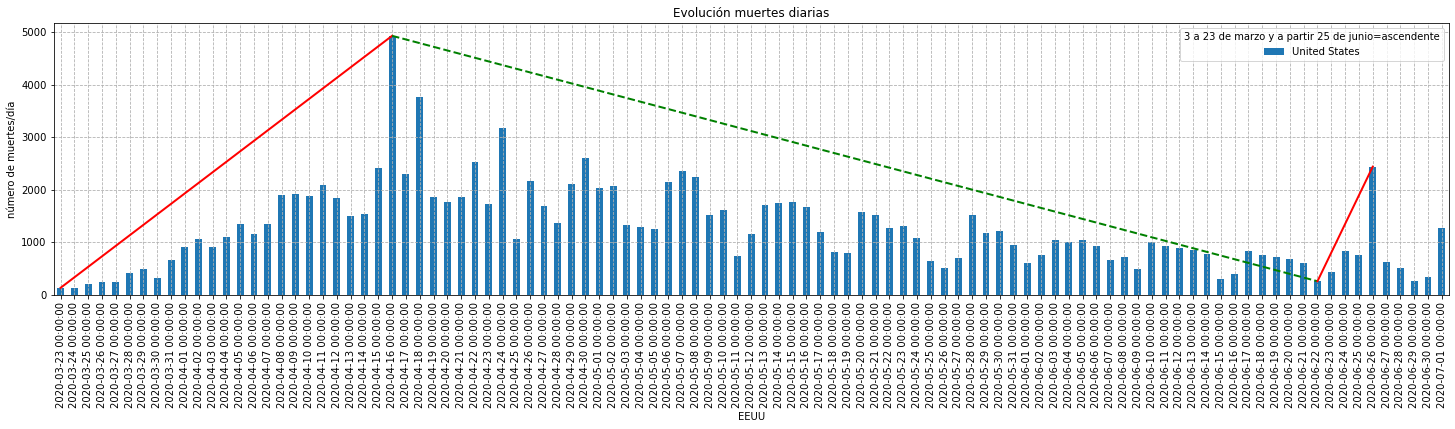

In [213]:
from matplotlib import pyplot as plt
plt.figure(figsize=(25,5))
datos_EEUU.plot(kind='bar')
plt.legend(title="3 a 23 de marzo y a partir 25 de junio=ascendente")
plt.xticks()
plt.grid(linestyle ='dashed')
plt.ylabel("número de muertes/día")
plt.title("Evolución muertes diarias")
plt.xlabel("EEUU")
plt.plot ([0 ,24], [131,4928],lw = 2,color='r')
plt.plot ([24 ,91], [4928,256],lw = 2,color='g',linestyle="--")
plt.plot ([91 ,95], [256,2437],lw = 2,color='r')